# GROUP 5 SARRIA 


# Index 

1. [GOALS & CRITERIA](#1-.Goals-&-Criteria)
2. [LOADING LIBRARIES & DATA](#2-.Loading-Libraries-&-Data)
3. [DATA EXPLORATION](#3-.Data-Exploration)
4. [IDENTIFY ANOMALIES & MISSING DATA ](#4-.Identify-Anomolies-&-Missing-Data)
5. [DATA PRE-PROCESSING](#5-.Data-Pre-Processing)
6. [LINEAR MODEL](#6-.Linear-Model)
7. [HYPERPARAMETER TUNNING & CROSS VALIDATION](#7-.Hyperparameter-Tunning-&-Cross-Validation)
8. [LASSO MODEL](#8-.Lasso-Model)
9. [RIDGE MODEL](#9-.Ridge-Model)
10. [CONCLUSION](#10-.CONCLUSION)

# 1. GOALS 7 CRITERIA

<p>The main goal of the project is to predict apartment prices in Barcelona in the year 2023. This is to be done by analyzing historical data, market trends, and key determinants that impact property values, and develop a robust predictive model capable of estimating apartment prices with a high degree of accuracy. 

<p>The main objectives: 
<ol>
        <li>Code runs </li>
        <li>Price prediction was made</li>
        <li>Accuracy of predictions for test properties is calculated in Kaggle </li>
        <li>Linear, Lasso, and Ridge models must be used </li>
        <li>Accuracy itself </li>
        <li>Data exploration </li>
        <li>Data preparation </li>
        <li>Hyperparameter optimization (alphas) </li>
        <li>Code is combined with neat and understandable commentary, with some titles and comments (demonstrate you have understood the methods and the outputs produced) </li>
        <li>Insights obtained  </li>
</ol>


# 2. LOADING LIBRARIES & DATA

<font size= 5> 2.1 Library Importing </font>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

<font size= 5> 2.2 Load Data </font>

<p> Two dataset given: 
<ol>
        <li>train.csv - contains data about number of rooms, bathrooms, crimes, neighborhood, price, etc to use during our modeling for predicting</li>
        <li>test.csv - contains the data to use to make prediction of housing prices</li>        
</ol>

In [130]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [48]:
df_train.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


# 3. DATA EXPLORATION 

In [49]:
df_train.shape

(8000, 15)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 937.6+ KB


In [51]:
df_train.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000


In [52]:
df_train.columns

Index(['id', 'num_rooms', 'num_baths', 'square_meters', 'orientation',
       'year_built', 'door', 'is_furnished', 'has_pool', 'neighborhood',
       'num_crimes', 'has_ac', 'accepts_pets', 'num_supermarkets', 'price'],
      dtype='object')

<font size = 6> 3.1 Variable Cleaning</font>

<font size = 5> 3.1.1 Door Variable</font>

<p> Before we start the rest of the exploration, we need to format the door variable to make it more intuitive and easier to use and impute. 
<ol>
    <li>Extract floor and door variable from the 'door' variable from the train and test data</li>
    <li>Delete original 'door' variable</li>
    <li>Make sure that the variable has consistent labels</li>
<ol>

In [131]:
# Create variables floor and door from the variable 'door'
df_train['num_floor'] = pd.to_numeric(df_train['door'].str.split('º').str[0], errors = 'coerce')
df_train.describe()

df_train['num_door'] = pd.to_numeric(df_train['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_train.describe()

# Delete 'door' varaible
df_train = df_train.drop(['door'], axis = 1)
display(df_train)

# Repeat of test data 
df_test['num_floor'] = pd.to_numeric(df_test['door'].str.split('º').str[0], errors = 'coerce')
df_test['num_door'] = pd.to_numeric(df_test['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_test = df_test.drop(['door'], axis = 1)
display(df_test)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,2.0,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,NaN,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,3.0,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,NaN,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,NaN,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1.0,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,NaN,1547,8.0,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Cors,0.0,False,False,NaN,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,3.0,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,NaN,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,NaN,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,3.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,NaN,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,NaN,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,NaN,9.0,1.0


<font size = 5> 3.1.2 Neighborhood & Orientation Variable</font>

In [132]:
# We study the different labels that non-numeric variables have

for column in df_train.select_dtypes(exclude = ['int', 'float']).columns:
    print(f"> {column}: {df_train[column].unique()}\n")

> orientation: [nan 'west' 'east' 'north' 'south' 'soxth']

> is_furnished: [False True nan]

> has_pool: [False True nan]

> neighborhood: ['Sant Martí' 'Sants' 'Eixample' 'Gràcia' nan 'Les Cors'
 'Sarrià-Sant Gervasi' 'Horta' 'Sant Andreu' 'Ciutat Vella' 'Nou Barris']

> has_ac: [True False nan]

> accepts_pets: [True False nan]



<p> Observing the data so far we have seen inconsistencies with the variables 'neighborhood' and 'orientation' for both train and test data. 
<p> Neighborhood Variable
<p> Consistent typos throughout the data:
<ol> 
            <li> Change 'Les Cors' to 'Les Corts' to have consistency in the data. </li>
<ol> 

<p>Orientation Variable
<p>Consistent typos throughout the data:
<ol> 
            <li> Change 'soxth' to 'south' to have consistency in the data. </li>
<ol>

In [133]:
# Neighborhood & Orientation spelling fixed
# Train Data

    # Neighborhood
df_train['neighborhood'] = df_train['neighborhood'].replace('Les Cors', 'Les Corts')
    # Orientation
df_train['orientation'] = df_train['orientation'].replace('soxth', 'south')

# Check that typo has been fixed in the train data
if not df_train['orientation'].isin(['soxth']).any() and not df_train['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

# Test Data 
    #Neighborhood
df_test['neighborhood'] = df_test['neighborhood'].replace('Les Cors', 'Les Corts')
    #Orientation
df_test['orientation'] = df_test['orientation'].replace('soxth', 'south')

# Checked the typo has been fixed in the test data 
if not df_test['orientation'].isin(['soxth']).any() and not df_test['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<
>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<


<font size = 6> 3.2 Exploratory Data Analysis</font>

<p>Here we will be exploring through graphs to have an understanding on important features to potentially use for the linear regression model, and that overall are going to be important varables to potentially consider for future housing prediction models. 

<font size = 5> 3.2.1 Price Variable (Target Variable)</font>

In [7]:
df_train.price.describe()

count    8000.000000
mean     1099.616250
std       271.686617
min       195.000000
25%       905.750000
50%      1104.000000
75%      1295.000000
max      2095.000000
Name: price, dtype: float64

We can see from the description above that the range of values are distributes quite widely. In order to better understand the target varaible, will be plotting skewness and kurtosis of the target variable, to better visualize. 

<p>Conclusion of graph: 
<p>Since our price variable is already distributed normaly no need to do any sort of transformation on it.

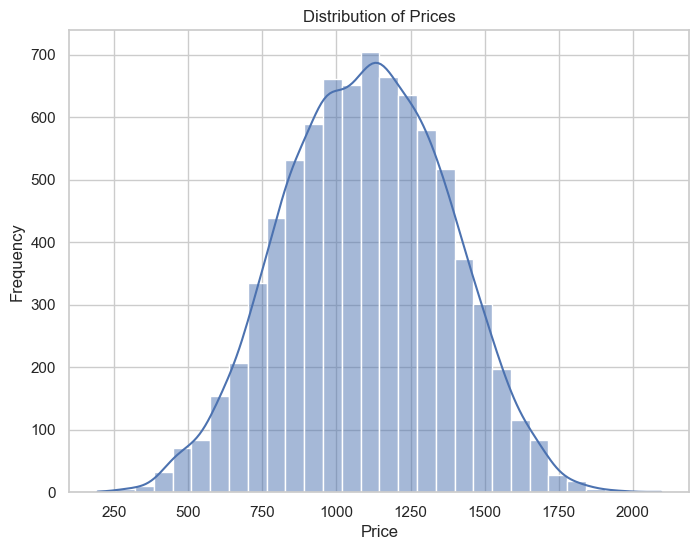

In [92]:
# Visualize the distribution of the variable 'PRICE'

plt.figure(figsize=(8, 6))
sns.histplot(df_train['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<font size = 5> 3.2.2 Visualization of Relationship Between Price and Features</font>

<p> In this section we will be visualizing several of our numerical features, as well as categorical to see their relationship with the target variable.

<font size = 4> 3.2.2.1 Square Meters vs Price</font>

This graph shows the general trend that as the apartment size increases, the price proportionally increases. (There are outliers in the dataset, these will be dealt with)

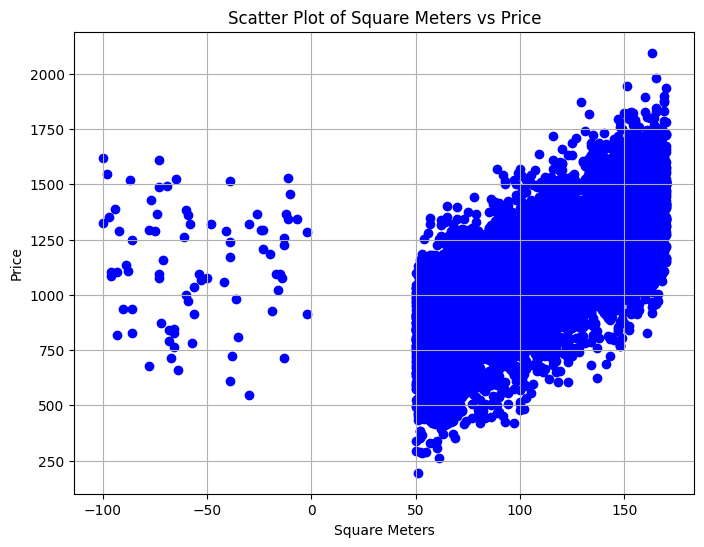

In [9]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_train['square_meters'], df_train['price'], c='b', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Meters vs Price')

# Show the plot
plt.grid(True)
plt.show()

<font size = 4> 3.2.2.2 Year Built vs Price</font>

This graph shows the relationship between the year the apartment was built and the price of the aparmtent. 

<p> Conclusion of Year built vs Price:
<p>Confirms our suspicions that older apartments are generally more expensive.This is because of their larger size and larger number of rooms. We will now check what effect neighborhood has an impact on the price.

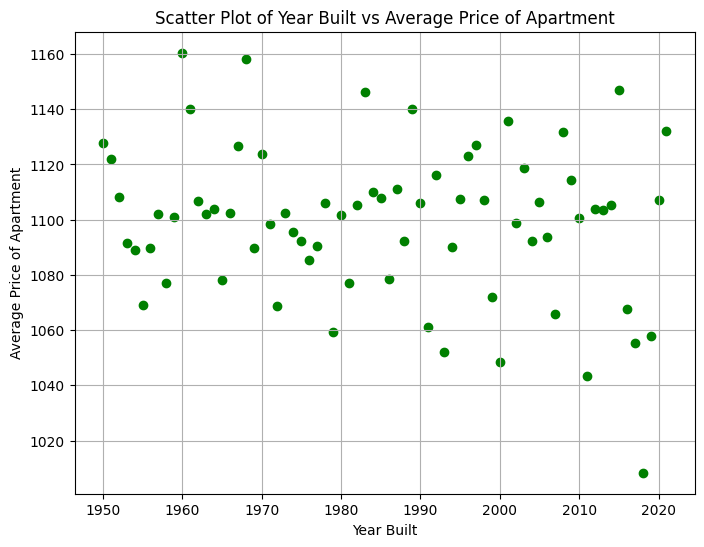

In [10]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['price'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['price'], c='g', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Price of Apartment')
plt.title('Scatter Plot of Year Built vs Average Price of Apartment')

# Show the plot
plt.grid(True)
plt.show()

<font size = 4> 3.2.2.3 Neighborhood vs Price</font>

This graph shows the relationship between the neighborhood the apartment is located in and the price of the aparmtent. 

<p> Conclusion of Neighborhood vs Price:
<p>The graph shows that the most expensive neighborhood is Sarria-Sant Gervasi. The cheapest neighborhood is Nou Barris. 

/var/folders/jp/ccdbvftd4pg2qt6s4b7bkv5m0000gn/T/ipykernel_3973/541548856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_price_by_neighborhood, x='neighborhood', y='price', palette='Set2')


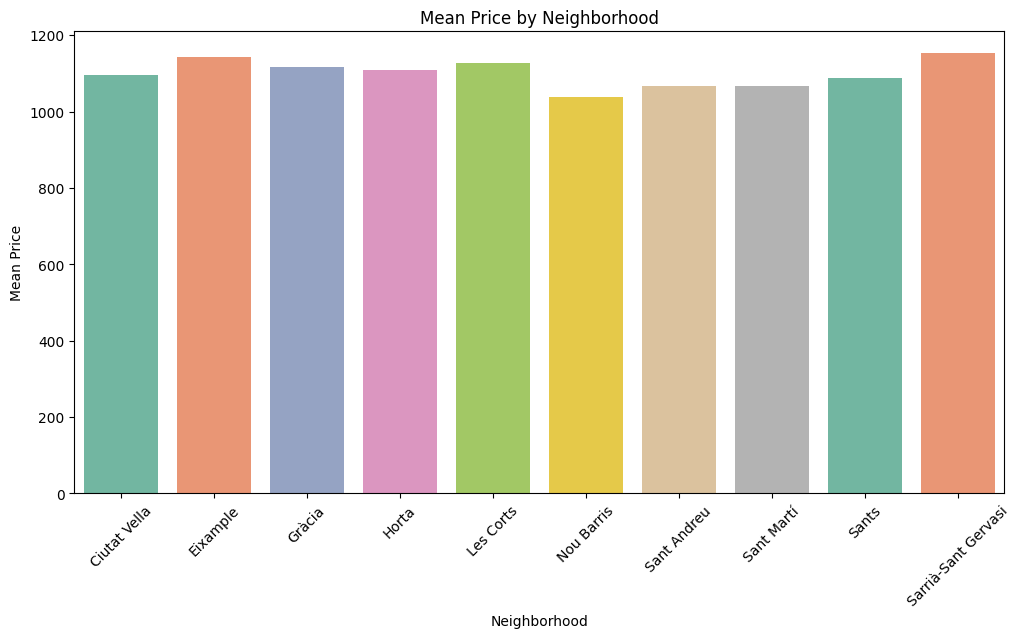

In [11]:
# Group the DataFrame by 'neighborhood' and calculate the median price for each neighborhood
median_price_by_neighborhood = df_train.groupby('neighborhood')['price'].mean().reset_index()

# Create a bar chart to display the median prices
plt.figure(figsize=(12, 6))
sns.barplot(data=median_price_by_neighborhood, x='neighborhood', y='price', palette='Set2')
plt.title('Mean Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

<font size = 4> 3.2.2.4 Number of Rooms vs Price</font>

This graph shows the relationship between the number of rooms in an apartment and the price of the apartment to see if it has an impact on the price. 

<p> Conclusion of Number of Rooms vs Price:
<p>The outliers impact the ability to infer a trend from this graph. In the Indentify Anomalies and Missing Data section the outliers will be treated. This graph will be reproduced and analysis conducted.

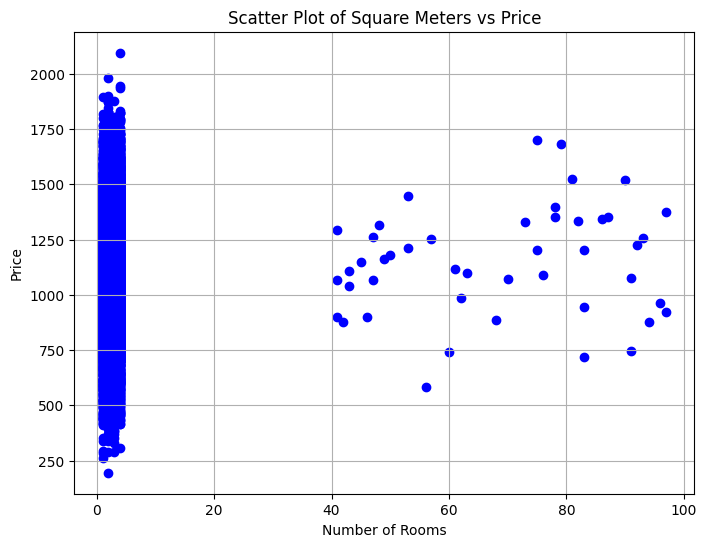

In [12]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_train['num_rooms'], df_train['price'], c='b', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Meters vs Price')

# Show the plot
plt.grid(True)
plt.show()

<font size = 4> 3.2.2.5 Number of Floors vs Price</font>

This graph shows the relationship between the number of floors that a building has  and the price of the apartment to see if it has an impact on the price. 

<p> Conclusion of Number of Floors vs Price:
<p>The price of apartments increases as the number of floors increases. 

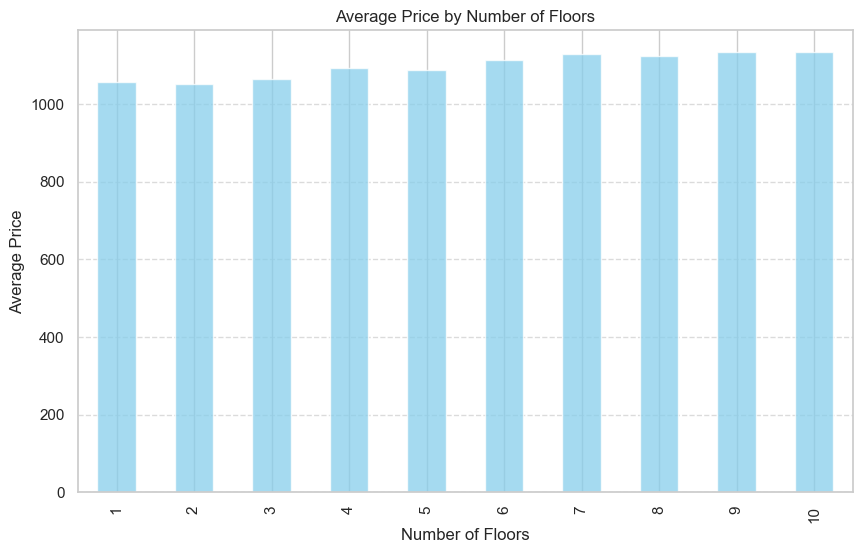

In [134]:
# Group the data by 'num_floor' and calculate the average price for each group
avg_price_by_floor = df_train.groupby('num_floor')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_floor.plot(kind='bar', color='skyblue', alpha=0.75)

# Set labels and title
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Floors')

# Update x-axis ticks to be integers
plt.xticks(range(len(avg_price_by_floor.index)), map(int, avg_price_by_floor.index))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font size = 4> 3.2.2.6 Orientation vs Price</font>

This graph shows the relationship between orientation and the price of the apartment to see if it has an impact on the price. 

<p> Conclusion of Orientation vs Price:
<p>Orientation does not have an impact on the price. This could be down to the number of NaN values in the orientation column. This will be reviewed in the Indentify Anomolies and Missing Data section.


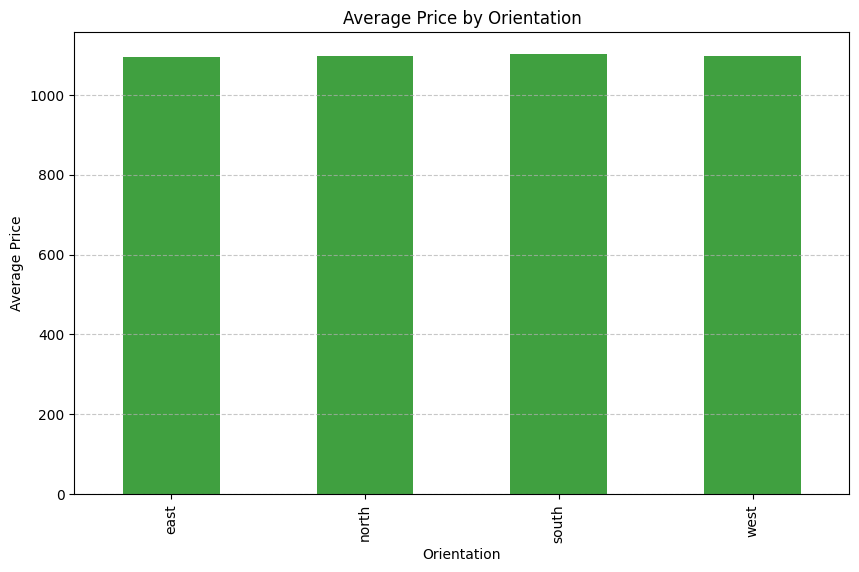

In [14]:
# Group the data by 'orientation' and calculate the average price for each group
avg_price_by_orientation = df_train.groupby('orientation')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_orientation.plot(kind='bar', color='green', alpha=0.75)

# Set labels and title
plt.xlabel('Orientation')
plt.ylabel('Average Price')
plt.title('Average Price by Orientation')  
plt.xticks(range(len(avg_price_by_orientation.index)), avg_price_by_orientation.index) 

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font size = 5> 3.2.3 Visualization of Relationship Between Features</font>

In this section we will be conducting visual analysis between our features to see if there is any trends between them. 

<font size = 4> 3.2.3.1 Year Built vs Number of Rooms</font>

<p>This graph shows the relationship between the year the apatment was built/constructed and the number of rooms the apatment has. 

<p> Conclusion of Year Built vs Number of Rooms:
<p>There is no clear trend between the year built and the average number of rooms.The average number of rooms is generally higher for the older apartments,the next graph will verify if older apartments are bigger in general.

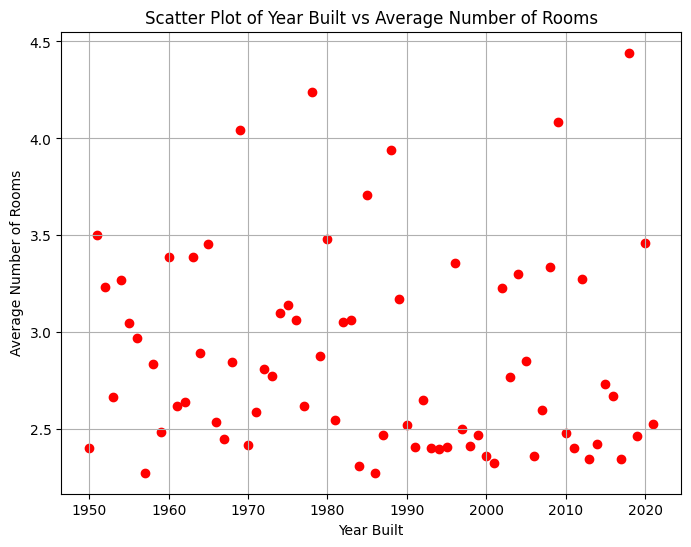

In [15]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['num_rooms'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['num_rooms'], c='r', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Number of Rooms')
plt.title('Scatter Plot of Year Built vs Average Number of Rooms')

# Show the plot
plt.grid(True)
plt.show()

<font size = 4> 3.2.3.2 Year Built vs Square Meters</font>

<p>This graph shows the relationship between the year the apatment was built/constructed and the square meters the apatment has. 

<p> Conclusion of Year Built vs Square Meters:
<p>Newer apartments are generally smaller than older apartments.The next graph dive deeper and check if older apartments are on average more expensive expensive.

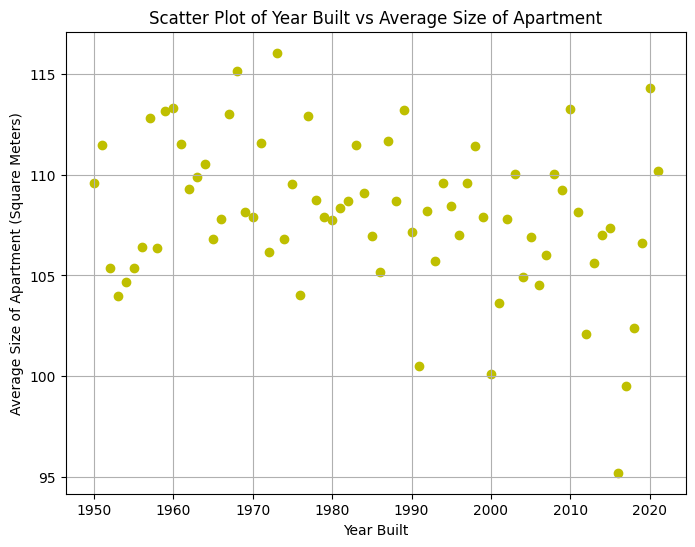

In [16]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['square_meters'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['square_meters'], c='y', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Size of Apartment (Square Meters)')
plt.title('Scatter Plot of Year Built vs Average Size of Apartment')

# Show the plot
plt.grid(True)
plt.show()

<font size = 4> 3.2.3.3 Neighborhood vs Has A Pool / Neighborhood vs Has AC</font>

<p>This graph shows the relationship between the neighborhood the apatment is located and if the apartment has a pool, as well as the relationship between neighborhood and if the apartment has AC. 

<p> Conclusion of Neighborhood vs Has A Pool & Neighborhood vs Has AC:
<p>There is a surprising low percentage of apartments that have AC and a high percentage of apartments that have a pool. This could be due to the fact that a lot of the data is missing for AC. This will be reviewed in the Indentify Anomolies and Missing Data section.

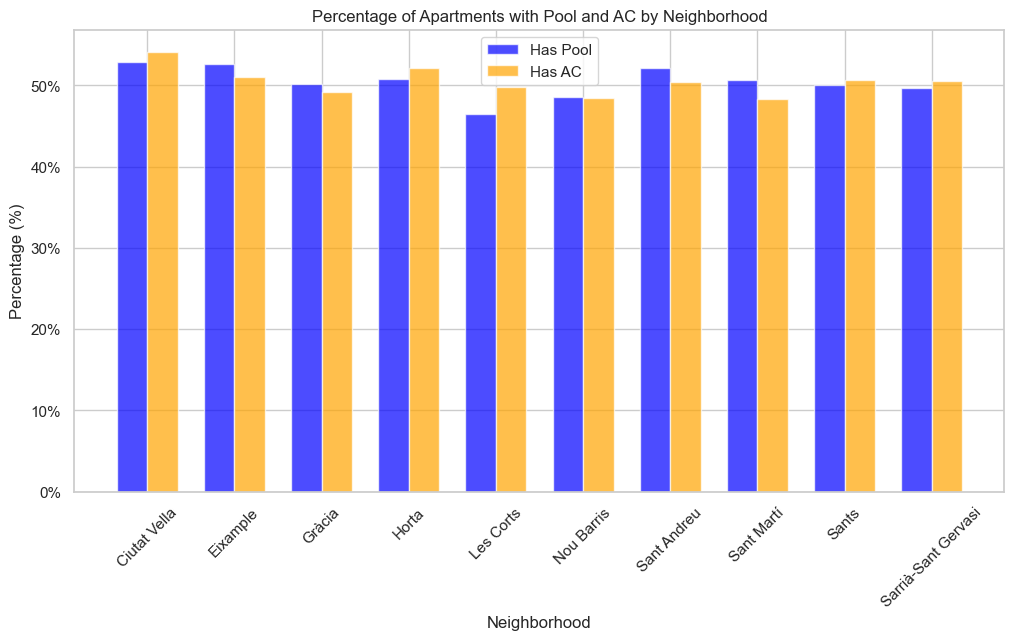

In [93]:
# Extract data
percentage_with_pool = df_train.groupby('neighborhood')['has_pool'].mean().reset_index()
percentage_with_ac = df_train.groupby('neighborhood')['has_ac'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(percentage_with_pool))

plt.bar(index, percentage_with_pool['has_pool'], bar_width, label='Has Pool', color='blue', alpha=0.7)
plt.bar(index + bar_width, percentage_with_ac['has_ac'], bar_width, label='Has AC', color='orange', alpha=0.7)

# Set title and labels
plt.title('Percentage of Apartments with Pool and AC by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage (%)')

# Customize the legend
plt.legend()

# Set x-axis labels and rotation
plt.xticks(index + bar_width / 2, percentage_with_pool['neighborhood'], rotation=45)

# Format y-axis tick labels as percentages

ax = plt.gca()

def to_percentage(y, _):
    return f'{y*100:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
plt.show()

<font size = 5> 3.2.4 Outlier Treatment</font>

<font size = 4> 3.2.4.1 Numerical Variable Outliers</font>

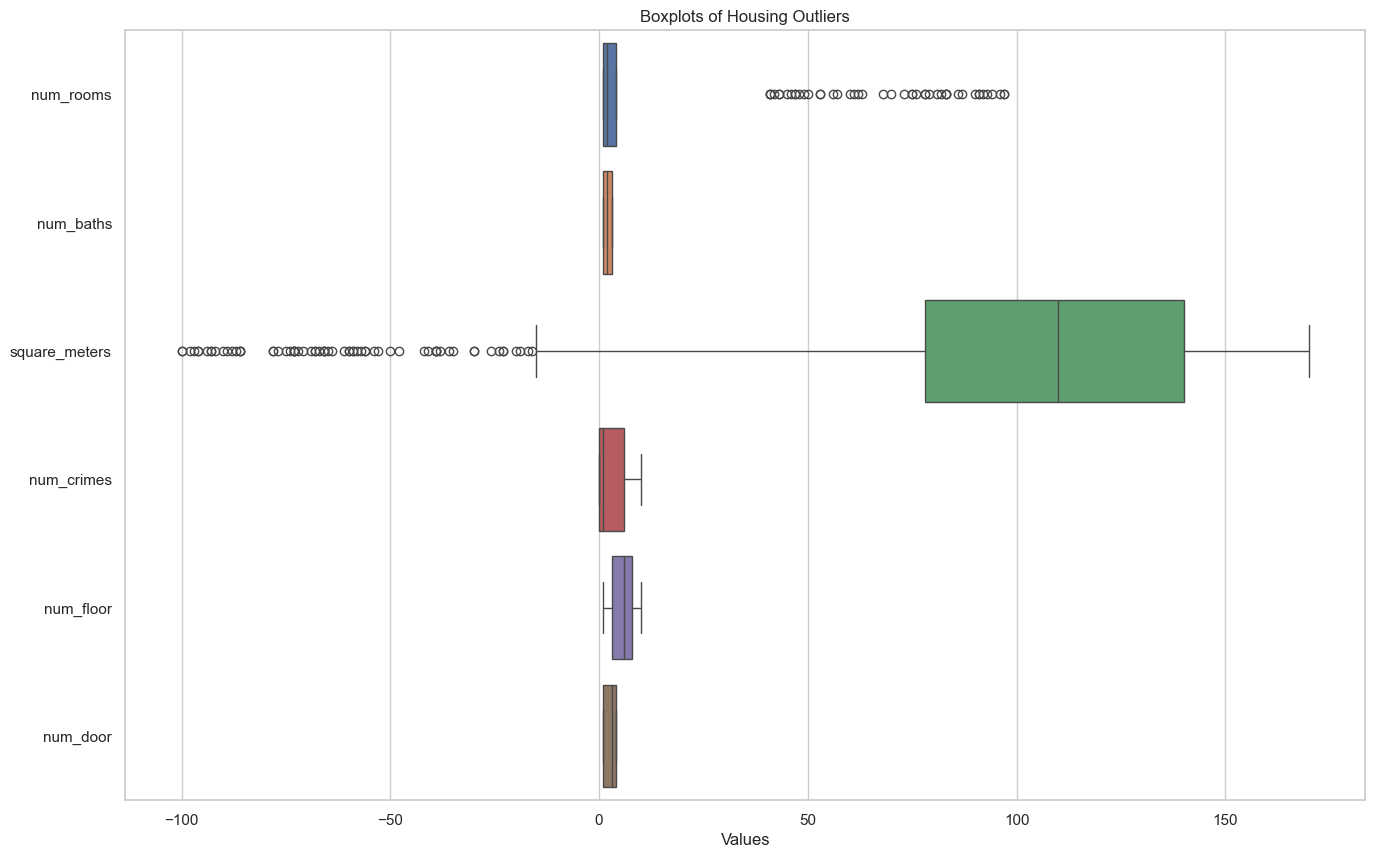

In [94]:
# Create a matrix of boxplots using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed

# Specify the columns you want to create boxplots for
columns_to_plot = ['num_rooms', 'num_baths', 'square_meters', 
                    'num_crimes',
                    'num_floor', 'num_door']

# Create the matrix of boxplots
sns.boxplot(data=df_train[columns_to_plot], orient="h")

# Customize the appearance or layout as needed
plt.title("Boxplots of Housing Outliers")
plt.xlabel("Values")
plt.show()


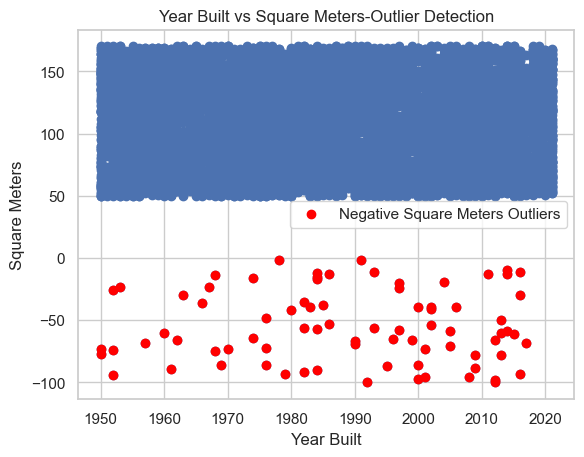

In [95]:
#drill into square_meters data
plt.scatter(df_train['year_built'], df_train['square_meters'])

outliers = df_train[df_train['square_meters'] < 0]
plt.scatter(outliers['year_built'], outliers['square_meters'], color='red', label='Negative Square Meters Outliers')

# Label  axes and add a title
plt.xlabel('Year Built')
plt.ylabel('Square Meters')
plt.title('Year Built vs Square Meters-Outlier Detection')

plt.legend()

# Show the plot
plt.show()

#Coloured in red are negative square meters values. These will be treated accordingly.

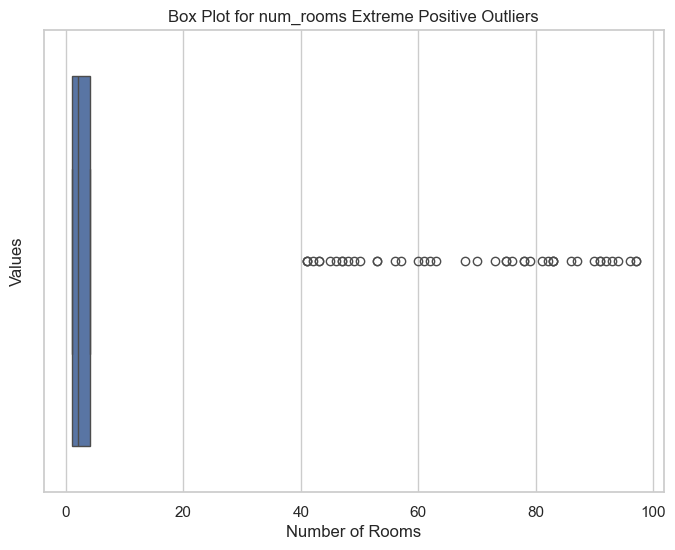

Extreme Positive Outliers:
        id  num_rooms  num_baths  square_meters orientation  year_built  \
86    6481       93.0        3.0          153.0       south      1960.0   
207   6337       47.0        1.0          149.0       north      1980.0   
326   5136       87.0        3.0          154.0        east      1982.0   
367   2692       79.0        2.0          141.0        west      1955.0   
441   7090       82.0        2.0          167.0       south      2004.0   
494   4760       70.0        1.0           89.0        west      1958.0   
597   8579       75.0        1.0          157.0         NaN      1989.0   
660   2860       73.0        NaN          127.0         NaN      1963.0   
663   2725       43.0        1.0          151.0        east      1969.0   
680   9577       57.0        2.0          131.0       north         NaN   
742   7047       48.0        1.0          125.0         NaN      1978.0   
789   9727       92.0        2.0          113.0       south      2020.0  

In [96]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the plot style
plt.figure(figsize=(8, 6))  
sns.boxplot(x='num_rooms', data=df_train)  # Create the boxplot

plt.xlabel('Number of Rooms')
plt.ylabel('Values')
plt.title('Box Plot for num_rooms Extreme Positive Outliers')
plt.show()

# Identify extreme positive outliers
extreme_outliers_num_rooms = df_train[df_train['num_rooms'] > 12]
print("Extreme Positive Outliers:")
print(extreme_outliers_num_rooms)

count_of_extreme_outliers = extreme_outliers_num_rooms.shape[0]
print("Number of Extreme Positive Outliers:", count_of_extreme_outliers)

total_data_points = len(df_train)
percentage_of_extreme_outliers = (count_of_extreme_outliers / total_data_points) * 100

print("Percentage of Extreme Positive Outliers:", percentage_of_extreme_outliers, "%")

# 4.IDENTIFY ANOMALIES & MISSING DATA 


<font size = 6> 4.1 Variables Missing at Random</font>

<p> In this section we will be looking at the data to see if the missing values are at random or not to better understand the features given.

<font size = 5> 4.1.1 Investigation of Missing at Random</font>

In [135]:
# INVESTIGATE WHETHER THE MISSING VALUES ARE AT RANDOM OR NOT
#TRAIN
nas_train = df_train.isna().sum()
nas_train

id                     0
num_rooms              0
num_baths            160
square_meters        155
orientation         2341
year_built           170
is_furnished         165
has_pool             156
neighborhood         165
num_crimes           160
has_ac               169
accepts_pets         155
num_supermarkets    6589
price                  0
num_floor            149
num_door             149
dtype: int64

In [136]:
#TEST 
nas_test = df_test.isna().sum()
nas_test
for col in df_test.columns:
    print(f"> {col}: {df_train[col].isna().sum() + df_test[col].isna().sum()}")

> id: 0
> num_rooms: 191
> num_baths: 200
> square_meters: 198
> orientation: 2864
> year_built: 200
> is_furnished: 200
> has_pool: 200
> neighborhood: 200
> num_crimes: 200
> has_ac: 200
> accepts_pets: 200
> num_supermarkets: 8215
> num_floor: 200
> num_door: 200


<font size = 5> 4.1.2 Graphing Missing at Random</font>

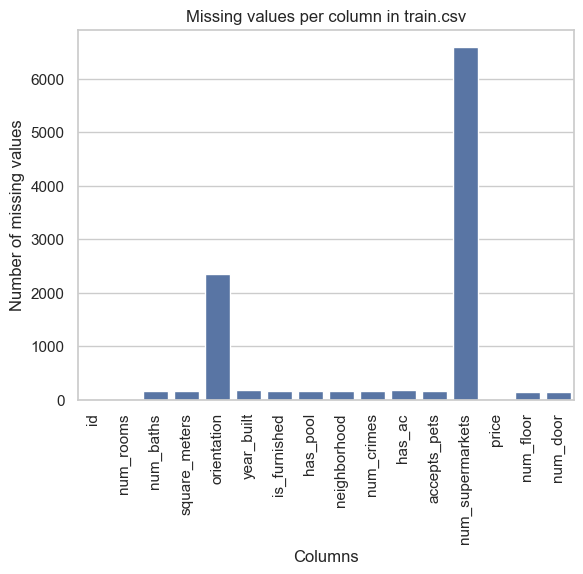

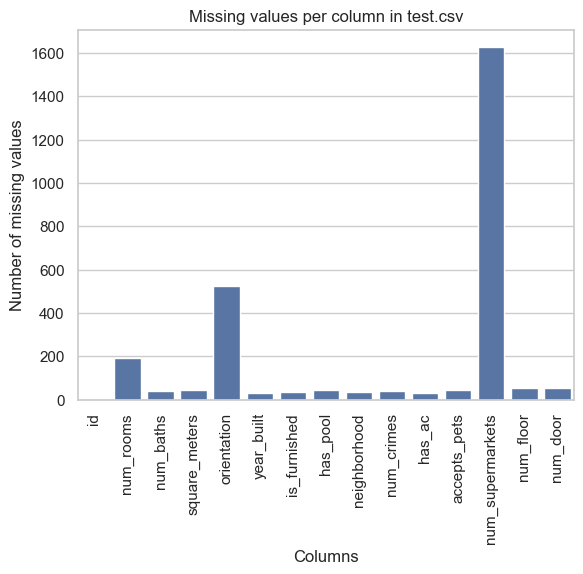

In [137]:
# GRAPHS FOR IF THE MISSING VALUES ARE AT RANDOM OR NOT
#TRAIN
sns.barplot(x = nas_train.index, y = nas_train.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in train.csv')
plt.show()

#TEST
sns.barplot(x = nas_test.index, y = nas_test.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in test.csv')
plt.show()

<font size = 6> 4.2 Testing Missing Data Is Completely At Random</font>

<font size = 5> 4.2.1 Testing Neighborhood Missing Data </font>

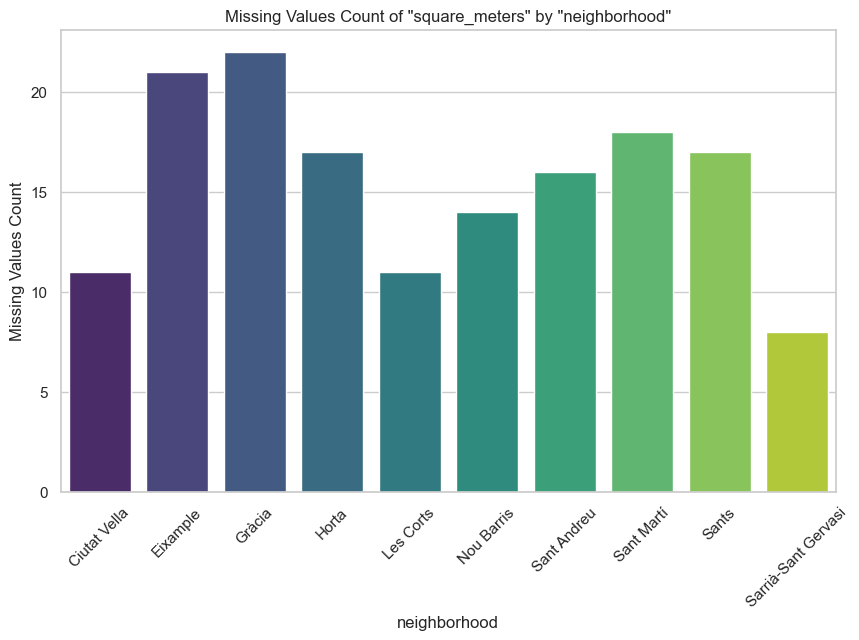

In [138]:
# Filter rows where 'neighborhood' is not missing
df_filtered = df_train.dropna(subset=['neighborhood'])

# Group the filtered DataFrame by values in 'square_meters' and calculate the count of missing values in 'neighborhood'
missing_values_counts = df_filtered.groupby('neighborhood')['square_meters'].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_counts.rename(columns={'square_meters': 'Missing Values Count'}, inplace=True)

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_values_counts, x='neighborhood', y='Missing Values Count', hue = 'neighborhood', palette='viridis', legend = False)
plt.title(f'Missing Values Count of "square_meters" by "neighborhood"')
plt.xlabel('neighborhood')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0


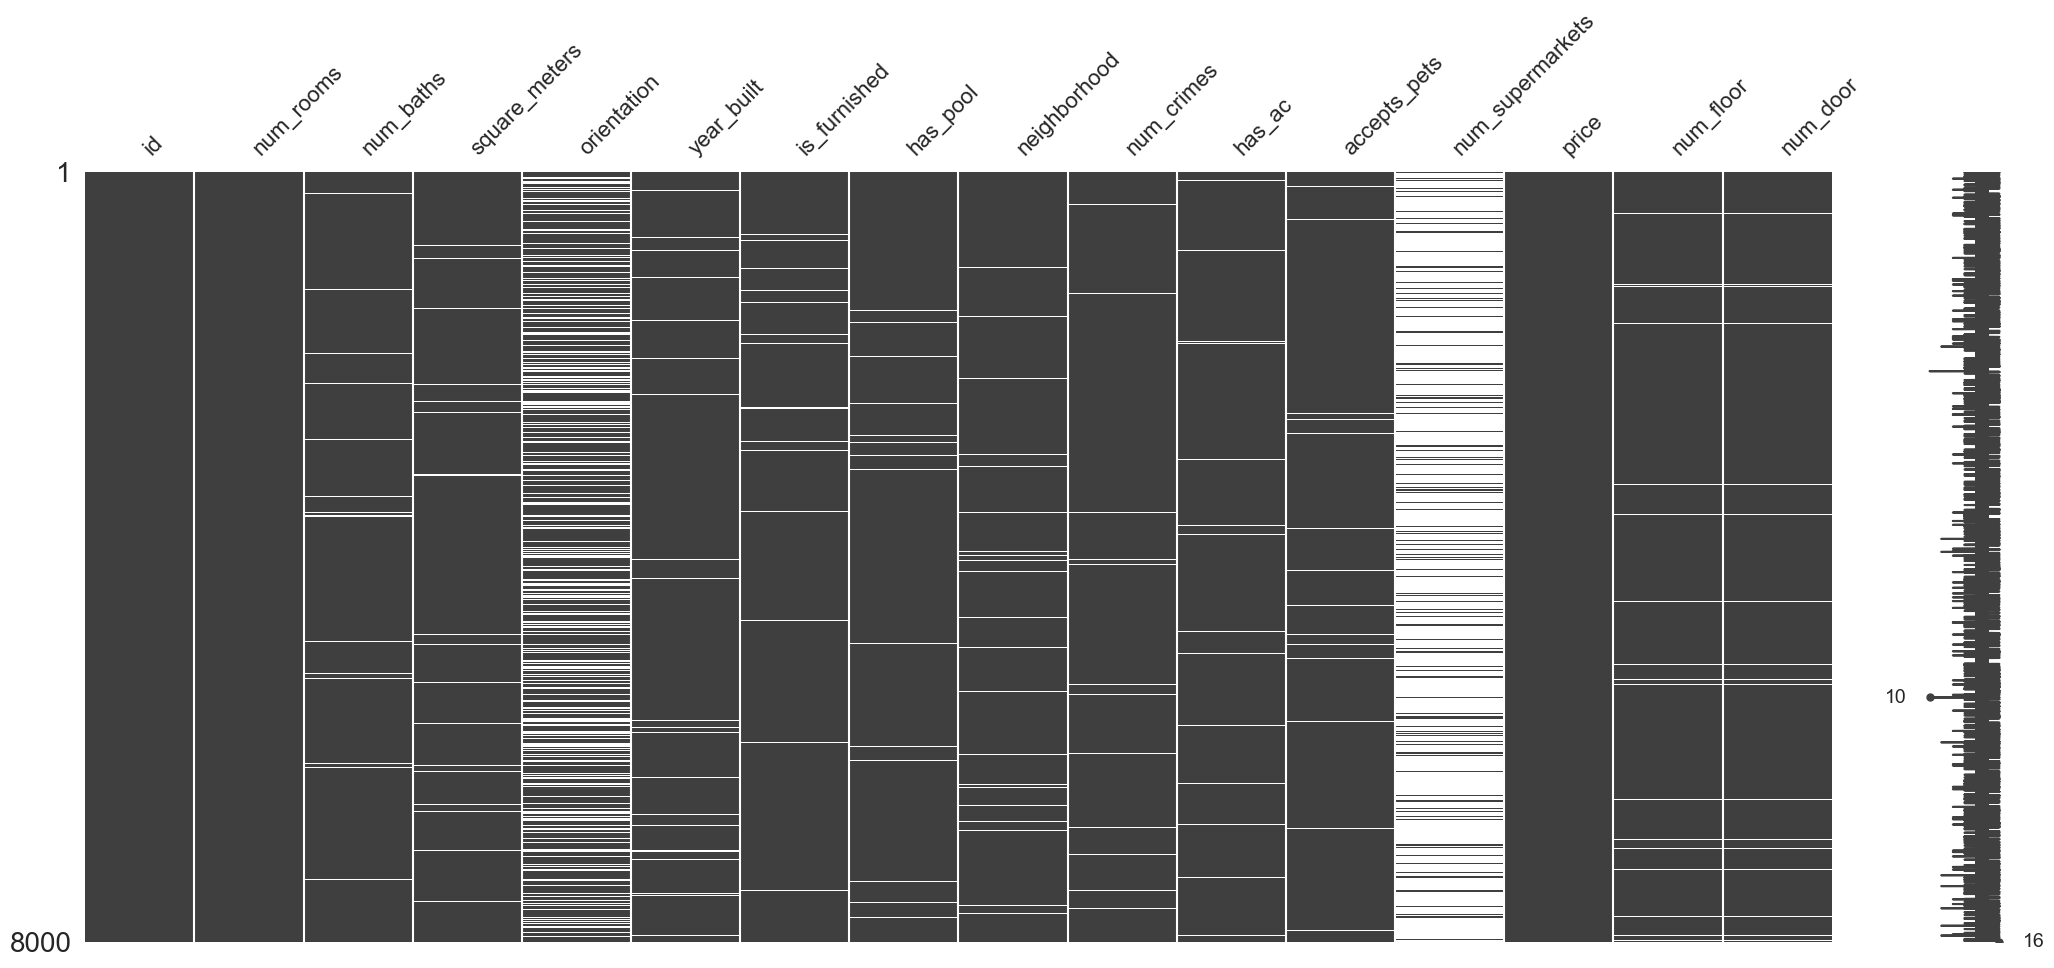

In [139]:
msno.matrix(df_train)

for column in df_train.columns:
    observed = df_train[column].notna().sum() + 0.5 # Count of observed values
    missing = df_train[column].isna().sum() + 0.5    # Count of missing values
    contingency_table = [[observed, missing]]
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f'p-value: {p}')


As we can observe, the missing values are very probably MCAR so we can handle them without too many problems.We will try different systems.


# 5. DATA PRE-PROCESSING

<font size = 6> 5.1 Checking Numerical and Categorical Variables</font>

In [140]:
# Checking if a variable is numerical or categorical 
numerical_vars = []
categorical_vars = []

for var in df_train.columns:
    
    
    numerical_bool = ('numerical' if df_train[var].dtype in ['int64', 'float64'] else 'categorical')
    
    if numerical_bool == 'numerical':
        numerical_vars.append(var)
    elif numerical_bool == 'categorical':
        categorical_vars.append(var)
    else:
        print('ERROR')
    
    #print(f"> {var}: is {numerical_bool}")

#Numerical List & Categorical List
display(pd.DataFrame({'numerical variables': numerical_vars}, index = range(1, len(numerical_vars)+1)))
display(pd.DataFrame({'categorical variables': categorical_vars}, index = range(1, len(categorical_vars)+1)))

,numerical variables
1,id
2,num_rooms
3,num_baths
4,square_meters
5,year_built
6,num_crimes
7,num_supermarkets
8,price
9,num_floor
10,num_door


,categorical variables
1,orientation
2,is_furnished
3,has_pool
4,neighborhood
5,has_ac
6,accepts_pets


<font size = 6> 5.2 Supermarket Variable</font>

<p>Since the num_supermarket column has more than 80% of the values missing we have decided to drop it as it would not be a reliable variable to use in our mdel. 

In [141]:
# num_supermarket dropping
# TRAIN DATA
df_train = df_train.drop(columns = ['num_supermarkets'], axis = 1)
display(df_train)
# TEST DATA
df_test = df_test.drop(columns = ['num_supermarkets'], axis = 1)
display(df_test)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,8.0,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Corts,0.0,False,False,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,9.0,1.0


<font size = 6> 5.3 Neighborhood Imputation</font>

<p> We imputated the most popular neighborhood into the NaNs, in order to preserve all rows of our dataset. 

In [142]:
# Imputing Most popular neighborhood for the NaNs
#Train dataset
'''
train_mode_neighborhood = df_train['neighborhood'].mode()[0]
df_train['neighborhood'].fillna(train_mode_neighborhood, inplace=True)
df_train.isna().sum()
'''

# Original imputation of neighborhood 
df_train = df_train.dropna(subset = ['neighborhood'])

In [41]:
# Test Dataset 
'''
test_mode_neighborhood=df_test['neighborhood'].mode()[0]
df_test['neighborhood'].fillna(test_mode_neighborhood, inplace=True)
df_test.isna().sum()
'''


<font size = 6> 5.4 Concatination of Datasets</font>

<p>We will then concatenate the train and test datasets to treat the missing values in the same way.

<font size=5> 5.4.1 TrainTest Column </font>
<p> Create a 'traintest' dataset to be able to seperate the test and train dataset at the end of imputation 

In [143]:
# Create a traintest column to later separate the original train dataset from the original test dataset
df_train['traintest']=1
df_test['traintest']=0

#TALK WITH GROUP IF WANT TO KEEP OR TRY GUILLEMS WAYS OF USING ID TO SEPERATE THEM TO THEIR ORIGINAL ID GROUPS< SHOULD CHECK IF ANY ID OVERLAPS THOUGH
#X_train = df_whole.loc[df_whole['id'].isin(df_train['id'])]
#X_train = X_train.drop(columns = ['price'], axis = 1)
#y_train = df_whole.loc[df_whole['id'].isin(df_train['id'])][['id', 'price']]
#y_train = y_train
#X_test = df_whole.loc[df_whole['id'].isin(df_test['id'])]
#X_test = X_test.drop(columns = ['price'], axis = 1)

<font size=5> 5.4.2 Concatenate </font>

In [144]:
df_whole = pd.concat([df_train, df_test], axis = 0, ignore_index = True)

<font size = 6> 5.5 Outliers for Numerical Variable</font>

<font size = 5> 5.5.1 Square meter outliers </font>

<p> Justification for the treatment used can be found below, in the section '3.2.4 OUTLIER TREATMENT'.

In [145]:
#positive_area_mean = df_whole[df_whole['square_meters'] >= 0]['square_meters'].mean()
#df_whole['square_meters'] = df_whole['square_meters'].apply(lambda x: x if x >= 0 else np.nan)

df_whole.loc[df_whole['square_meters'] < 10, 'square_meters'] = np.nan # Guillem: trying to impute nan to the outliers

df_whole['square_meters'].describe()

count    9541.000000
mean      109.766377
std        34.945274
min        50.000000
25%        79.000000
50%       110.000000
75%       140.000000
max       170.000000
Name: square_meters, dtype: float64

<font size = 5>5.5.2 Number of Rooms outliers </font>
<p> Justification for the treatment used can be found below, in the section '3.2.4 OUTLIER TREATMENT'.

In [146]:
# Number of rooms outlier treatment
df_whole.loc[df_whole['num_rooms'] > 12, 'num_rooms'] = np.nan

<font size = 6> 5.6 Dummy Variables</font>

We will change the dummy variables to 0/1 instead of False/True for variable 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets'


In [147]:
bool_variables = ['is_furnished',
                    'has_pool',
                    'has_ac',
                    'accepts_pets']

for catvar in bool_variables:
    df_whole[catvar] = df_whole[catvar].map({True: 1, False: 0})

display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door,traintest
0,9255,1.0,1.0,NaN,NaN,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,1096.0,3.0,1.0,1
1,1562,4.0,1.0,133.0,west,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,1396.0,7.0,2.0,1
2,1671,2.0,3.0,137.0,NaN,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,1263.0,1.0,1.0,1
3,6088,1.0,2.0,NaN,NaN,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,1290.0,6.0,1.0,1
4,6670,2.0,1.0,70.0,NaN,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,962.0,5.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,3.0,3.0,95.0,south,1976.0,1.0,1.0,Sarrià-Sant Gervasi,0.0,1.0,1.0,NaN,5.0,2.0,0
9831,8286,1.0,2.0,161.0,NaN,1984.0,1.0,0.0,Nou Barris,9.0,0.0,0.0,NaN,5.0,1.0,0
9832,7854,4.0,3.0,111.0,NaN,1957.0,1.0,1.0,Gràcia,0.0,0.0,1.0,NaN,4.0,2.0,0
9833,1096,2.0,1.0,154.0,north,2018.0,0.0,0.0,Nou Barris,7.0,0.0,0.0,NaN,9.0,1.0,0


<font size = 6> 5.7 Standarize Data</font>

<p> We will Standardize the pertinent variables (numerical variables that are not dummies).


In [148]:
# Standarize Data
scaler = StandardScaler()
vars_to_scale = [
    'square_meters',
    'num_rooms',
    'num_baths',
    'year_built',
    'num_crimes',
    'num_floor',
    'num_door',
]
df_whole[vars_to_scale] = scaler.fit_transform(df_whole[vars_to_scale])
display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door,traintest
0,9255,-1.330886,-1.216409,NaN,NaN,-1.422690,0.0,0.0,Sant Martí,-0.223638,1.0,1.0,1096.0,-0.909016,-1.330730,1
1,1562,1.345185,-1.216409,0.664892,west,-1.228787,0.0,0.0,Sants,0.359485,0.0,0.0,1396.0,0.492984,-0.440127,1
2,1671,-0.438862,1.235740,0.779363,NaN,0.710249,0.0,1.0,Eixample,-0.806761,0.0,0.0,1263.0,-1.610016,-1.330730,1
3,6088,-1.330886,0.009665,NaN,NaN,0.807200,0.0,1.0,Sants,0.651046,0.0,0.0,1290.0,0.142484,-1.330730,1
4,6670,-0.438862,-1.216409,-1.138021,NaN,-0.307745,1.0,0.0,Gràcia,-0.806761,0.0,1.0,962.0,-0.208016,-1.330730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.422579,south,-0.453173,1.0,1.0,Sarrià-Sant Gervasi,-0.806761,1.0,1.0,NaN,-0.208016,-0.440127,0
9831,8286,-1.330886,0.009665,1.466187,NaN,-0.065365,1.0,0.0,Nou Barris,1.817292,0.0,0.0,NaN,-0.208016,-1.330730,0
9832,7854,1.345185,1.235740,0.035303,NaN,-1.374214,1.0,1.0,Gràcia,-0.806761,0.0,1.0,NaN,-0.558516,-0.440127,0
9833,1096,-0.438862,-1.216409,1.265863,north,1.582814,0.0,0.0,Nou Barris,1.234169,0.0,0.0,NaN,1.193984,-1.330730,0


<font size = 6> 5.8 KNN Imputation</font>

<p> We will impute all of the missing values using KNNImputer except for variables 'orientation and 'neighborhood' (and without taking price into account).


In [149]:
df_whole_impute = df_whole.copy()
df_whole_impute = df_whole_impute.drop(columns = ['id', 'orientation', 'neighborhood', 'price', 'traintest'], axis = 1)
display(df_whole_impute)

,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,-1.330886,-1.216409,NaN,-1.422690,0.0,0.0,-0.223638,1.0,1.0,-0.909016,-1.330730
1,1.345185,-1.216409,0.664892,-1.228787,0.0,0.0,0.359485,0.0,0.0,0.492984,-0.440127
2,-0.438862,1.235740,0.779363,0.710249,0.0,1.0,-0.806761,0.0,0.0,-1.610016,-1.330730
3,-1.330886,0.009665,NaN,0.807200,0.0,1.0,0.651046,0.0,0.0,0.142484,-1.330730
4,-0.438862,-1.216409,-1.138021,-0.307745,1.0,0.0,-0.806761,0.0,1.0,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...
9830,0.453161,1.235740,-0.422579,-0.453173,1.0,1.0,-0.806761,1.0,1.0,-0.208016,-0.440127
9831,-1.330886,0.009665,1.466187,-0.065365,1.0,0.0,1.817292,0.0,0.0,-0.208016,-1.330730
9832,1.345185,1.235740,0.035303,-1.374214,1.0,1.0,-0.806761,0.0,1.0,-0.558516,-0.440127
9833,-0.438862,-1.216409,1.265863,1.582814,0.0,0.0,1.234169,0.0,0.0,1.193984,-1.330730


In [150]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors = 10, missing_values = np.nan)
imputed_data = knn_imputer.fit_transform(df_whole_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_whole_impute.columns)
df_whole_impute = imputed_df
df_whole_impute[bool_variables] = df_whole_impute[bool_variables].round(0).astype('int64')
display(df_whole_impute)

,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,-1.330886,-1.216409,0.081092,-1.422690,0,0,-0.223638,1,1,-0.909016,-1.330730
1,1.345185,-1.216409,0.664892,-1.228787,0,0,0.359485,0,0,0.492984,-0.440127
2,-0.438862,1.235740,0.779363,0.710249,0,1,-0.806761,0,0,-1.610016,-1.330730
3,-1.330886,0.009665,0.092539,0.807200,0,1,0.651046,0,0,0.142484,-1.330730
4,-0.438862,-1.216409,-1.138021,-0.307745,1,0,-0.806761,0,1,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...
9830,0.453161,1.235740,-0.422579,-0.453173,1,1,-0.806761,1,1,-0.208016,-0.440127
9831,-1.330886,0.009665,1.466187,-0.065365,1,0,1.817292,0,0,-0.208016,-1.330730
9832,1.345185,1.235740,0.035303,-1.374214,1,1,-0.806761,0,1,-0.558516,-0.440127
9833,-0.438862,-1.216409,1.265863,1.582814,0,0,1.234169,0,0,1.193984,-1.330730


In [151]:
common_cols = df_whole.columns.intersection(df_whole_impute.columns)
df_whole[common_cols] = df_whole_impute[common_cols]

'''
for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")
'''

df_neigh_impute = df_whole.copy()
df_neigh_impute = df_neigh_impute.drop(columns = ['id', 'orientation', 'price', 'traintest'], axis = 1)

#display(df_whole[df_whole['id'] == 8572])

list_of_neigh = df_neigh_impute['neighborhood'].unique()
list_of_neigh = list_of_neigh.tolist()
list_of_neigh.remove(np.nan)
#display(list_of_neigh, len(list_of_neigh))

mapping = {}

for i in range(len(list_of_neigh)):
    mapping[list_of_neigh[i]] = range(len(list_of_neigh))[i] + 1

rev_mapping = {value: key for key, value in mapping.items()}
#display(mapping, rev_mapping)

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(mapping)

#labeler = LabelEncoder()
#labeler.fit(df_neigh_impute['neighborhood'])
#df_neigh_impute['neighborhood'] = labeler.transform(df_neigh_impute['neighborhood'])
#display(df_neigh_impute)
#display(df_neigh_impute.loc[7757])

knn_imputer = KNNImputer(n_neighbors = 10)
imputed_data = knn_imputer.fit_transform(df_neigh_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_neigh_impute.columns)
df_neigh_impute['neighborhood'] = imputed_df['neighborhood'].round(0)

#display(df_neigh_impute.loc[7757])
#df_neigh_impute['neighborhood'] = labeler.inverse_transform(df_neigh_impute['neighborhood'].astype(int))

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(rev_mapping)

print((df_whole['neighborhood'] == df_neigh_impute['neighborhood']).sum())

df_whole['neighborhood'] = df_neigh_impute['neighborhood']


for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")


#display(df_whole[df_whole['neighborhood'].isna()])

display(df_whole)
display(df_neigh_impute)

for col in df_neigh_impute.columns:
    print((df_whole[col] == df_neigh_impute[col]).sum())

9800
> id: 0 missing values
> num_rooms: 0 missing values
> num_baths: 0 missing values
> square_meters: 0 missing values
> orientation: 2822 missing values
> year_built: 0 missing values
> is_furnished: 0 missing values
> has_pool: 0 missing values
> neighborhood: 0 missing values
> num_crimes: 0 missing values
> has_ac: 0 missing values
> accepts_pets: 0 missing values
> price: 2000 missing values
> num_floor: 0 missing values
> num_door: 0 missing values
> traintest: 0 missing values


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door,traintest
0,9255,-1.330886,-1.216409,0.081092,NaN,-1.422690,0,0,Sant Martí,-0.223638,1,1,1096.0,-0.909016,-1.330730,1
1,1562,1.345185,-1.216409,0.664892,west,-1.228787,0,0,Sants,0.359485,0,0,1396.0,0.492984,-0.440127,1
2,1671,-0.438862,1.235740,0.779363,NaN,0.710249,0,1,Eixample,-0.806761,0,0,1263.0,-1.610016,-1.330730,1
3,6088,-1.330886,0.009665,0.092539,NaN,0.807200,0,1,Sants,0.651046,0,0,1290.0,0.142484,-1.330730,1
4,6670,-0.438862,-1.216409,-1.138021,NaN,-0.307745,1,0,Gràcia,-0.806761,0,1,962.0,-0.208016,-1.330730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.422579,south,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,NaN,-0.208016,-0.440127,0
9831,8286,-1.330886,0.009665,1.466187,NaN,-0.065365,1,0,Nou Barris,1.817292,0,0,NaN,-0.208016,-1.330730,0
9832,7854,1.345185,1.235740,0.035303,NaN,-1.374214,1,1,Gràcia,-0.806761,0,1,NaN,-0.558516,-0.440127,0
9833,1096,-0.438862,-1.216409,1.265863,north,1.582814,0,0,Nou Barris,1.234169,0,0,NaN,1.193984,-1.330730,0


,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,-1.330886,-1.216409,0.081092,-1.422690,0,0,Sant Martí,-0.223638,1,1,-0.909016,-1.330730
1,1.345185,-1.216409,0.664892,-1.228787,0,0,Sants,0.359485,0,0,0.492984,-0.440127
2,-0.438862,1.235740,0.779363,0.710249,0,1,Eixample,-0.806761,0,0,-1.610016,-1.330730
3,-1.330886,0.009665,0.092539,0.807200,0,1,Sants,0.651046,0,0,0.142484,-1.330730
4,-0.438862,-1.216409,-1.138021,-0.307745,1,0,Gràcia,-0.806761,0,1,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0.453161,1.235740,-0.422579,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,-0.208016,-0.440127
9831,-1.330886,0.009665,1.466187,-0.065365,1,0,Nou Barris,1.817292,0,0,-0.208016,-1.330730
9832,1.345185,1.235740,0.035303,-1.374214,1,1,Gràcia,-0.806761,0,1,-0.558516,-0.440127
9833,-0.438862,-1.216409,1.265863,1.582814,0,0,Nou Barris,1.234169,0,0,1.193984,-1.330730


9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835


In [152]:
nas_train = df_train.isna().sum()
nas_test = df_test.isna().sum()

print(df_whole['is_furnished'].isna().sum())
print(df_whole['is_furnished'].sum())
print(df_whole_impute['is_furnished'].sum())

for catvar in bool_variables:
    print((df_whole_impute[catvar] == df_whole[catvar]).sum() == 9835 - (nas_train + nas_test)[catvar])

0
4745
4745
False
False
False
False


In [153]:
#common_cols = df_whole.columns.intersection(df_whole_impute.columns)
#df_whole[common_cols] = df_whole_impute[common_cols]
df_whole
#print(df_whole['neighborhood'].isna().sum())

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door,traintest
0,9255,-1.330886,-1.216409,0.081092,NaN,-1.422690,0,0,Sant Martí,-0.223638,1,1,1096.0,-0.909016,-1.330730,1
1,1562,1.345185,-1.216409,0.664892,west,-1.228787,0,0,Sants,0.359485,0,0,1396.0,0.492984,-0.440127,1
2,1671,-0.438862,1.235740,0.779363,NaN,0.710249,0,1,Eixample,-0.806761,0,0,1263.0,-1.610016,-1.330730,1
3,6088,-1.330886,0.009665,0.092539,NaN,0.807200,0,1,Sants,0.651046,0,0,1290.0,0.142484,-1.330730,1
4,6670,-0.438862,-1.216409,-1.138021,NaN,-0.307745,1,0,Gràcia,-0.806761,0,1,962.0,-0.208016,-1.330730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.422579,south,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,NaN,-0.208016,-0.440127,0
9831,8286,-1.330886,0.009665,1.466187,NaN,-0.065365,1,0,Nou Barris,1.817292,0,0,NaN,-0.208016,-1.330730,0
9832,7854,1.345185,1.235740,0.035303,NaN,-1.374214,1,1,Gràcia,-0.806761,0,1,NaN,-0.558516,-0.440127,0
9833,1096,-0.438862,-1.216409,1.265863,north,1.582814,0,0,Nou Barris,1.234169,0,0,NaN,1.193984,-1.330730,0


<font size = 6> 5.9 OneHotEncoding</font>

<p> We will apply OneHotEncoding to the variables 'neighborhood' and 'orientation'.


In [154]:
def OHencoder(data, list_of_columns):
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data = encoder.fit_transform(data[[list_of_columns]]).toarray()
    encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([list_of_columns]), index = data.index)
    encoded_df = pd.concat([data, encoded_df], axis = 1)
    
    return encoded_df

df_whole = OHencoder(df_whole, 'neighborhood')
df_whole = OHencoder(df_whole, 'orientation')
df_whole = df_whole.drop(columns = ['orientation_nan', 'orientation', 'neighborhood'])
display(df_whole)

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,9255,-1.330886,-1.216409,0.081092,-1.422690,0,0,-0.223638,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1562,1.345185,-1.216409,0.664892,-1.228787,0,0,0.359485,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1671,-0.438862,1.235740,0.779363,0.710249,0,1,-0.806761,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6088,-1.330886,0.009665,0.092539,0.807200,0,1,0.651046,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6670,-0.438862,-1.216409,-1.138021,-0.307745,1,0,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.422579,-0.453173,1,1,-0.806761,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9831,8286,-1.330886,0.009665,1.466187,-0.065365,1,0,1.817292,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,7854,1.345185,1.235740,0.035303,-1.374214,1,1,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,1096,-0.438862,-1.216409,1.265863,1.582814,0,0,1.234169,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [115]:
'''
# Standarize Data
scaler = StandardScaler()
vars_to_scale = [
    'square_meters',
    'num_rooms',
    'num_baths',
    'year_built',
    'num_crimes',
    'num_floor',
    'num_door',
]
df_whole[vars_to_scale] = scaler.fit_transform(df_whole[vars_to_scale])
display(df_whole)
'''

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,9255,-1.349256,-1.226740,-0.048231,-1.435857,0,0,-0.224881,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1562,1.363729,-1.226740,0.674128,-1.240157,0,0,0.363557,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1671,-0.444928,1.247165,0.790170,0.716840,0,1,-0.813319,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6088,-1.349256,0.010213,0.708941,0.814690,0,1,0.657776,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6670,-0.444928,-1.226740,-1.153528,-0.310584,1,0,-0.813319,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.459401,1.247165,-0.428268,-0.457358,1,1,-0.813319,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9831,8286,-1.349256,0.010213,1.486420,-0.065959,1,0,1.834652,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,7854,1.363729,1.247165,0.035899,-1.386932,1,1,-0.813319,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,1096,-0.444928,-1.226740,1.283347,1.597489,0,0,1.246214,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [155]:
for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")

> id: 0 missing values
> num_rooms: 0 missing values
> num_baths: 0 missing values
> square_meters: 0 missing values
> year_built: 0 missing values
> is_furnished: 0 missing values
> has_pool: 0 missing values
> num_crimes: 0 missing values
> has_ac: 0 missing values
> accepts_pets: 0 missing values
> price: 2000 missing values
> num_floor: 0 missing values
> num_door: 0 missing values
> traintest: 0 missing values
> neighborhood_Ciutat Vella: 0 missing values
> neighborhood_Eixample: 0 missing values
> neighborhood_Gràcia: 0 missing values
> neighborhood_Horta: 0 missing values
> neighborhood_Les Corts: 0 missing values
> neighborhood_Nou Barris: 0 missing values
> neighborhood_Sant Andreu: 0 missing values
> neighborhood_Sant Martí: 0 missing values
> neighborhood_Sants: 0 missing values
> neighborhood_Sarrià-Sant Gervasi: 0 missing values
> orientation_east: 0 missing values
> orientation_north: 0 missing values
> orientation_south: 0 missing values
> orientation_west: 0 missing val

<font size = 6> 5.10 Correlation Matrix</font>

price                               1.000000
square_meters                       0.713041
num_floor                           0.103750
num_rooms                           0.071416
neighborhood_Sarrià-Sant Gervasi    0.062878
neighborhood_Eixample               0.053185
neighborhood_Les Corts              0.032882
num_baths                           0.025603
neighborhood_Gràcia                 0.021519
is_furnished                        0.011553
neighborhood_Horta                  0.009948
id                                  0.008370
orientation_south                   0.004404
has_pool                            0.000010
orientation_west                   -0.000666
neighborhood_Ciutat Vella          -0.004603
orientation_north                  -0.008467
accepts_pets                       -0.008489
has_ac                             -0.009862
orientation_east                   -0.010755
neighborhood_Sants                 -0.015055
year_built                         -0.015798
num_door  

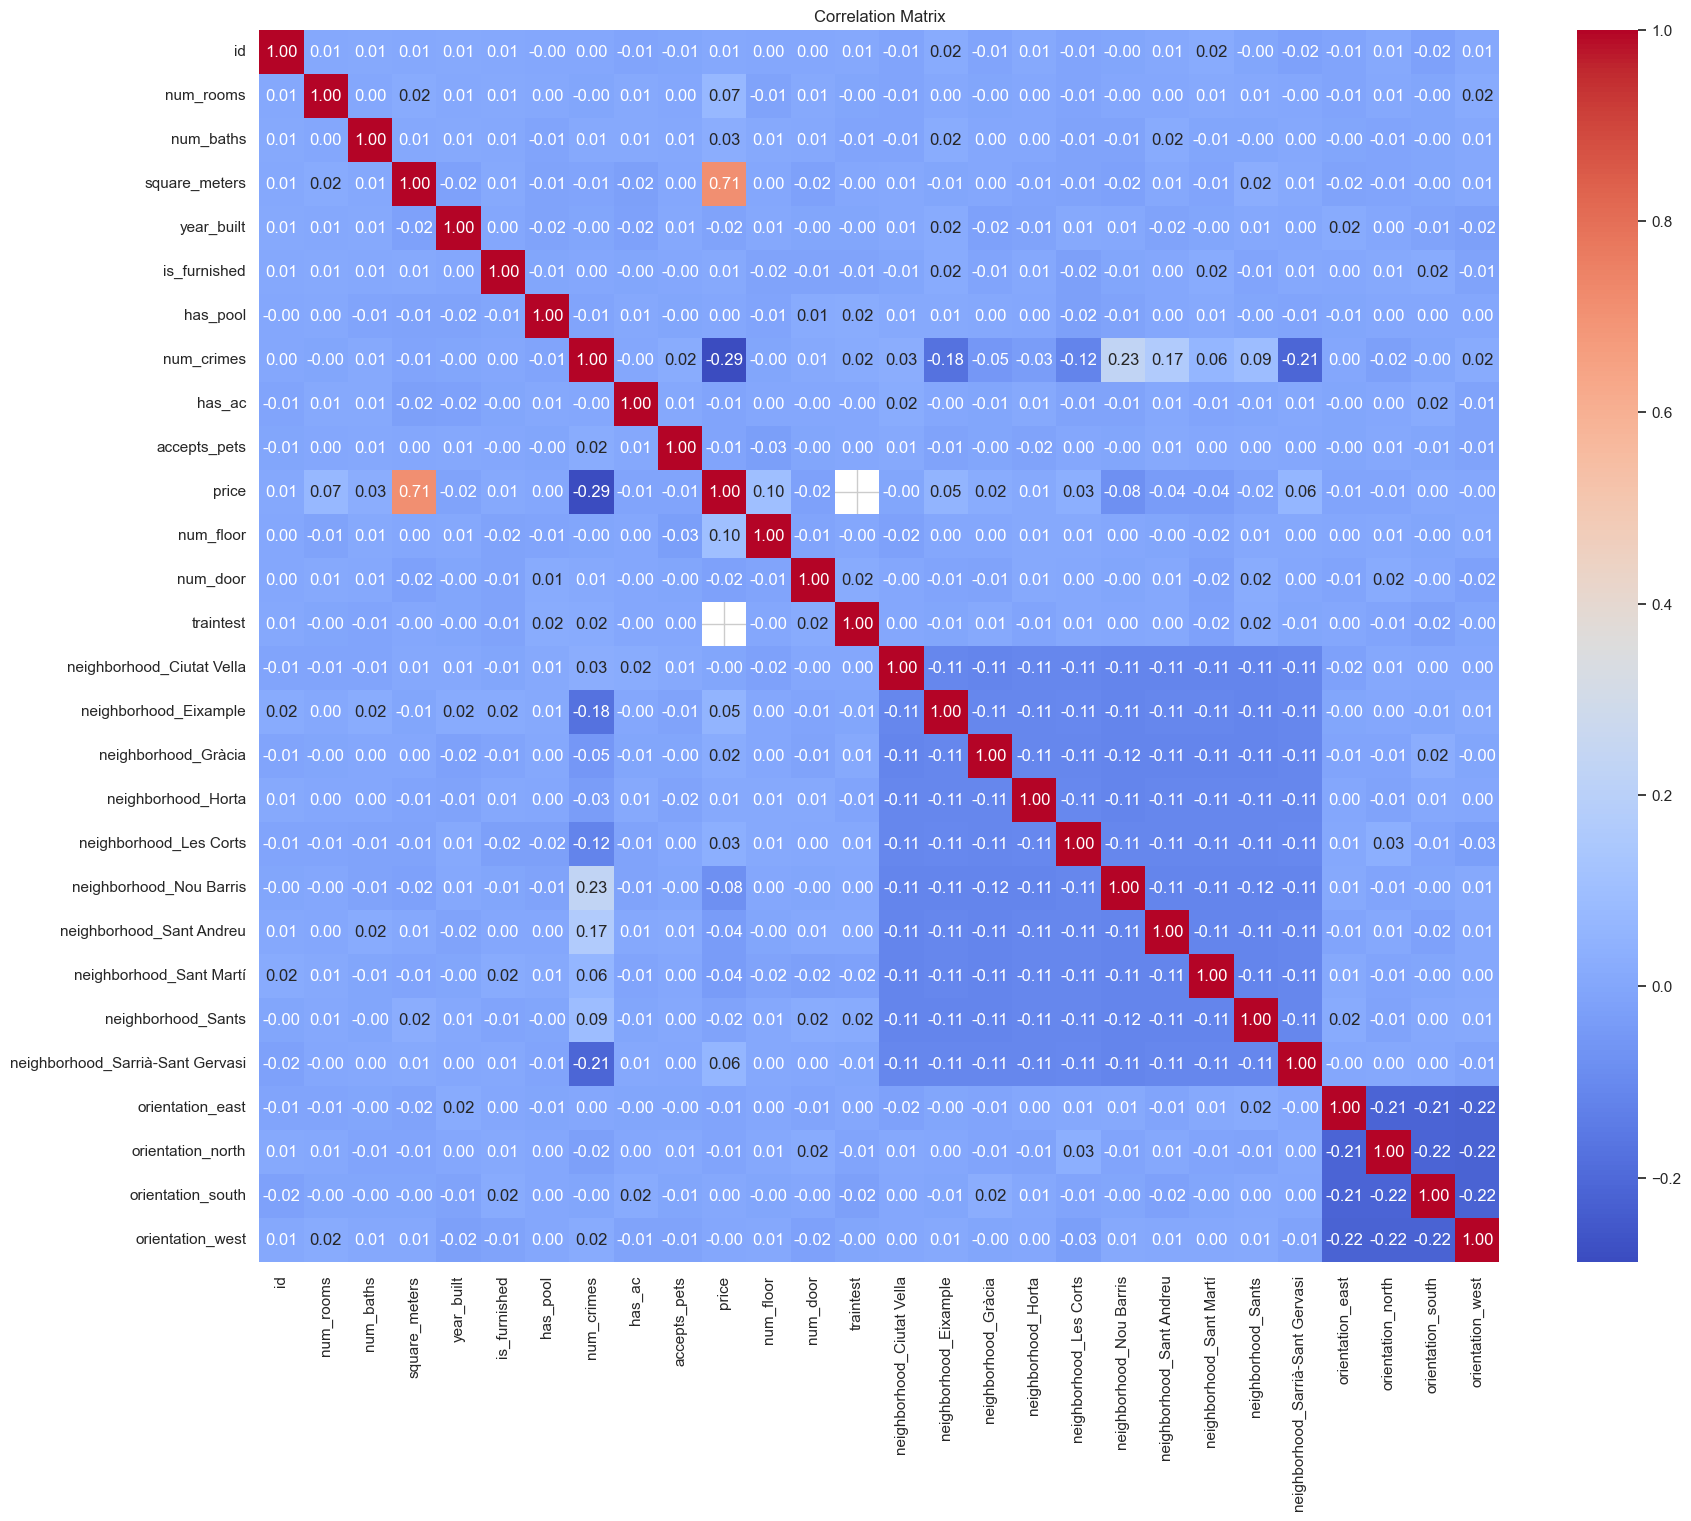

In [116]:
correlation_matrix = df_whole.corr(numeric_only = True)

print(correlation_matrix['price'].sort_values(ascending = False))

# Set up the figure size
plt.figure(figsize=(20, 16))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add labels and title
plt.title("Correlation Matrix")
plt.show()

<font size = 6> 5.11 Separate the Train and Test Data</font>

<p>We will then separate the train original imputated dataset and the test original imputated dataset again and X, y, X_test


#rename them to X_train, X_test, y_train. 


In [ ]:
#NOT USING THIS METHOD

"""# 9.
X_train = df_whole.loc[df_whole['id'].isin(df_train['id'])]
X_train = X_train.drop(columns = ['price'], axis = 1)

y_train = df_whole.loc[df_whole['id'].isin(df_train['id'])][['id', 'price']]
#y_train = y_train

X_test = df_whole.loc[df_whole['id'].isin(df_test['id'])]
X_test = X_test.drop(columns = ['price'], axis = 1)

#display(X_train, y_train, X_test)
#print('neighborhood' in X_train.columns, 'orientation.nan' in X_test.columns)
print(X_train.columns)"""

In [117]:
# X_train 
X = df_whole[df_whole['traintest']==1]
display(X)
# X_test
X_test = df_whole[df_whole['traintest']==0]
display(X_test)
feature_columns = ['id','num_rooms', 'num_baths', 'square_meters', 'year_built',
                  'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
                    'num_floor', 'neighborhood_Ciutat Vella',
                   'neighborhood_Eixample', 'neighborhood_Gràcia', 'neighborhood_Horta',
                   'neighborhood_Les Corts', 'neighborhood_Nou Barris',
                   'neighborhood_Sant Andreu', 'neighborhood_Sant Martí',
                   'neighborhood_Sants', 'neighborhood_Sarrià-Sant Gervasi',
                   'orientation_east', 'orientation_north', 'orientation_south',
                   'orientation_west']

X = X[feature_columns] 
X.reset_index(drop=True, inplace=True)
# reset the index for the test data 
X_test.reset_index(drop=True, inplace=True)
#y_train
y = df_train[['id', 'price']]
y.reset_index(drop=True, inplace=True)
display(y)

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,9255,-1.349256,-1.226740,-0.048231,-1.435857,0,0,-0.224881,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1562,1.363729,-1.226740,0.674128,-1.240157,0,0,0.363557,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1671,-0.444928,1.247165,0.790170,0.716840,0,1,-0.813319,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6088,-1.349256,0.010213,0.708941,0.814690,0,1,0.657776,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6670,-0.444928,-1.226740,-1.153528,-0.310584,1,0,-0.813319,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,5735,-0.444928,-0.360873,-0.428268,1.744264,0,0,-0.813319,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7831,5192,1.363729,1.247165,1.631472,0.472215,0,0,1.834652,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7832,5391,1.363729,-1.226740,-0.602330,1.450714,1,0,-0.813319,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7833,861,1.363729,0.010213,1.660483,-0.408433,0,1,-0.813319,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
7835,6253,-0.083196,-1.226740,1.225326,1.303939,1,1,-0.813319,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7836,4685,-0.173629,0.010213,-0.573320,-1.386932,1,0,-0.224881,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7837,1732,0.097669,0.010213,-0.689361,0.276516,0,0,-0.813319,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7838,4743,0.007236,1.247165,1.573451,0.814690,0,1,1.246214,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7839,4522,-0.444928,-1.226740,-0.312226,-0.065959,1,1,-0.813319,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.459401,1.247165,-0.428268,-0.457358,1,1,-0.813319,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9831,8286,-1.349256,0.010213,1.486420,-0.065959,1,0,1.834652,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,7854,1.363729,1.247165,0.035899,-1.386932,1,1,-0.813319,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,1096,-0.444928,-1.226740,1.283347,1.597489,0,0,1.246214,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,id,price
0,9255,1096
1,1562,1396
2,1671,1263
3,6088,1290
4,6670,962
...,...,...
7830,5735,1066
7831,5192,1255
7832,5391,1220
7833,861,1547


<font size = 6> 5.12 Train Data Split</font>

<p> We will create a new dataset and separate it into Xt_train, Xt_test, yt_train and yt_test (it will be created from the main one and be used to perform cross validation).


In [118]:
# 10.
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

for dataset in [Xt_train, Xt_test, yt_train, yt_test]:
    dataset.drop(columns = 'id', axis = 1, inplace = True)

display(Xt_train, Xt_test, yt_train, yt_test)

,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_floor,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
1737,1.363729,1.247165,0.819181,-0.310584,1,0,-0.813319,1,1,-0.563398,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3821,0.459401,1.247165,0.122930,-1.435857,1,0,-0.813319,1,0,-1.624782,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1158,-0.444928,1.247165,-1.704726,-0.653058,1,1,-0.813319,1,1,0.144191,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4693,-0.444928,0.010213,-1.501653,0.521140,1,1,-0.813319,1,1,1.205574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5169,0.459401,1.247165,1.080274,-1.191232,0,1,-0.813319,0,1,0.851780,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1.363729,-1.226740,0.238972,0.325441,0,1,0.363557,0,0,0.497985,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,-0.444928,0.010213,0.120029,-0.310584,0,1,-0.519100,1,0,-1.624782,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,1.363729,0.010213,1.631472,-1.680482,0,1,1.246214,0,1,0.497985,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7603,0.459401,-1.226740,0.471055,1.695339,1,1,-0.813319,0,0,1.205574,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_floor,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
1142,1.363729,-1.226740,-1.066497,-1.484782,1,0,0.069338,1,0,-1.270987,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6978,-0.444928,1.247165,-1.153528,-0.408433,0,1,-0.813319,1,0,-0.209604,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3765,-1.349256,-1.226740,0.761160,1.597489,1,1,1.834652,1,0,1.205574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1677,0.459401,1.247165,0.238972,0.178666,0,1,0.069338,1,0,-1.270987,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3539,0.459401,-1.226740,1.631472,-0.457358,1,1,1.246214,0,1,1.559369,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,1.363729,1.247165,1.051264,-0.002356,1,0,0.363557,0,0,-0.917193,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6529,1.363729,0.010213,-1.269570,1.303939,0,0,-0.813319,0,0,0.851780,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5015,0.459401,1.247165,-0.776393,0.276516,0,1,1.834652,0,1,1.205574,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6992,-1.349256,-1.226740,1.457410,-0.653058,1,1,-0.813319,0,1,1.205574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,price
1737,999
3821,1050
1158,1129
4693,952
5169,1324
...,...
5226,1240
5390,1367
860,1550
7603,1146


,price
1142,1074
6978,1013
3765,1141
1677,1047
3539,1353
...,...
6243,1189
6529,1140
5015,443
6992,1322


# 6. LINEAR MODEL

In [97]:
#Ed draft model code

# Import necessary libraries
#from sklearn.model_selection import train_test_split  #split data into training and testing sets

#Part 1: create model
df_train_dropna = df_train[['id','square_meters', 'num_rooms', 'num_baths', 'price']].dropna(axis=0) 
print(df_train_dropna)

df_test_dropna = df_test[['id', 'square_meters', 'num_rooms', 'num_baths']].fillna(df_test.mean(numeric_only=True)) 
print(df_test_dropna)

# Split the data into features (X) and target (y)
X_train_features = df_train_dropna[['square_meters', 'num_rooms', 'num_baths']] #we need to select the key feature columns 
y_train = df_train_dropna['price'] #what we want to predict

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression() #LR model created and initialised
model.fit(X_train_features, y_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(X_train_features) #via the trained model

#Part 2: Check Model

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred) #measure model performance, lower the MSE the better the fit between the predicted and the actual prices.  
#print(f"Mean Squared Error: {mse}")
#Part 3 Predict and add apartment prices in the test dataset

# Use trained model to predict prices for apartments in the test dataset
#test_data = pd.read_csv('test.csv')  # Load your test dataset
X_test_features = df_test_dropna[['square_meters', 'num_rooms', 'num_baths']]
predicted_prices = model.predict(X_test_features)

# Add the predicted prices to the test dataset
df_test_dropna['price'] = predicted_prices
df_test_dropna['price'] = df_test_dropna['price'].astype(int)
df_test_dropna['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
df_test_dropna[['id', 'price']].to_csv('predicted_apartment_prices.csv', index=False)

        id  square_meters  num_rooms  num_baths  price
1     1562          133.0        4.0        1.0   1396
2     1671          137.0        2.0        3.0   1263
3     6088           41.0        1.0        2.0   1290
4     6670           70.0        2.0        1.0    962
5     5934           77.0        4.0        2.0    760
...    ...            ...        ...        ...    ...
7994  6266           62.0        3.0        3.0    928
7996  5192          166.0        4.0        3.0   1255
7997  5391           89.0        4.0        1.0   1220
7998   861          167.0        4.0        2.0   1547
7999  7271           95.0        2.0        1.0   1133

[7686 rows x 5 columns]
        id  square_meters  num_rooms  num_baths
0     6253          152.0   4.533444        1.0
1     4685           90.0   4.533444        2.0
2     1732           86.0   4.533444        2.0
3     4743          164.0   4.533444        3.0
4     4522           99.0   4.533444        1.0
...    ...            ...  

In [ ]:
# NEWST LINEAR REGRESSION MODEL
'''
selected_vars = ['num_rooms',
                'square_meters',
                'num_floor',
                'num_crimes',
                'neighborhood_Les Corts',
                'neighborhood_Sant Andreu',
                'neighborhood_Sant Martí',
                'neighborhood_Sants',
                'neighborhood_Sarrià-Sant Gervasi',
                'neighborhood_Eixample',
                'neighborhood_Gràcia',
                'neighborhood_Horta',
                'neighborhood_Ciutat Vella',
                'neighborhood_Nou Barris',
                'is_furnished',
                'num_baths',
                'year_built',
                'has_ac']
'''

non_selected_vars = [
    'id',
    'num_door'
]

Xf_train = X_train.drop(columns = non_selected_vars, axis = 1)
yf_train = y_train.drop(columns = 'id', axis = 1)
Xf_test = X_test.drop(columns = non_selected_vars, axis = 1)

model = LinearRegression() #LR model created and initialised
model.fit(Xf_train, yf_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(Xf_train) #via the trained model

predicted_prices = model.predict(Xf_test)

# Add the predicted prices to the test dataset
X_test['price'] = predicted_prices
X_test['price'] = X_test['price'].astype(int)
X_test['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
X_test[['id', 'price']].to_csv('predicted_apartment_prices_v3.csv', index=False)

# 7. HYPERPARAMETER TUNNING & CROSS VALIDATION

<font size=5> 7.1.2 Hyperparameter Tunning & Cross Validation for Lasso</font>

In [119]:
# Define a range of alpha values to try
alphas = np.logspace(-10, 0 ,50)

# Initialize variables to store the best alpha and minimum MSE
best_alpha_lasso = None
min_mse_lasso = float('inf')

# Loop over the alpha values and fit Lasso model
for alpha in alphas:
    # Fit Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(Xt_train, yt_train)
    y_pred_lasso = lasso.predict(Xt_test)
    mse_lasso = mean_squared_error(yt_test, y_pred_lasso)

    # Update best alpha and minimum MSE for Lasso
    if mse_lasso < min_mse_lasso:
        min_mse_lasso = mse_lasso
        best_alpha_lasso = alpha

print("Best alpha for Lasso:", round(best_alpha_lasso,3))
print("Minimum MSE for Lasso:", round(min_mse_lasso,3))

/Users/guillemmirabentrubinat/.pyenv/versions/3.12.0/envs/bse/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+07, tolerance: 4.587e+04
  model = cd_fast.enet_coordinate_descent(
/Users/guillemmirabentrubinat/.pyenv/versions/3.12.0/envs/bse/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+07, tolerance: 4.587e+04
  model = cd_fast.enet_coordinate_descent(
/Users/guillemmirabentrubinat/.pyenv/versions/3.12.0/envs/bse/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might wa

Best alpha for Lasso: 1.0
Minimum MSE for Lasso: 29114.495


<font size=5> 7.1.2 Hyperparameter Tunning & Cross Validation for Ridge </font>

In [120]:
# Define a range of alpha values to try
alphas = np.logspace(-10, 0 ,50)

# Initialize variables to store the best alpha and minimum MSE
best_alpha_ridge = None
min_mse_ridge = float('inf')

# Loop over the alpha values and fit Ridge model
for alpha in alphas:
    # Fit Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(Xt_train, yt_train)
    y_pred_ridge = ridge.predict(Xt_test)
    mse_ridge = mean_squared_error(yt_test, y_pred_ridge)

    # Update best alpha and minimum MSE for Ridge
    if mse_ridge < min_mse_ridge:
        min_mse_ridge = mse_ridge
        best_alpha_ridge = alpha

# Print the best alpha and minimum MSE for Ridge
print("Best alpha for Ridge:", round(best_alpha_ridge,3))
print("Minimum MSE for Ridge:", round(min_mse_ridge,3))

Best alpha for Ridge: 1.0
Minimum MSE for Ridge: 29238.906


# 8. LASSO MODEL

<font size=5> 8.1 Optimal Coefficients </font>

In [121]:
#Optimal coefficients:
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(Xt_train, yt_train)
coefs_lasso = lasso.coef_

<font size=5> 8.2 Graph of Optimal Coefficients </font>

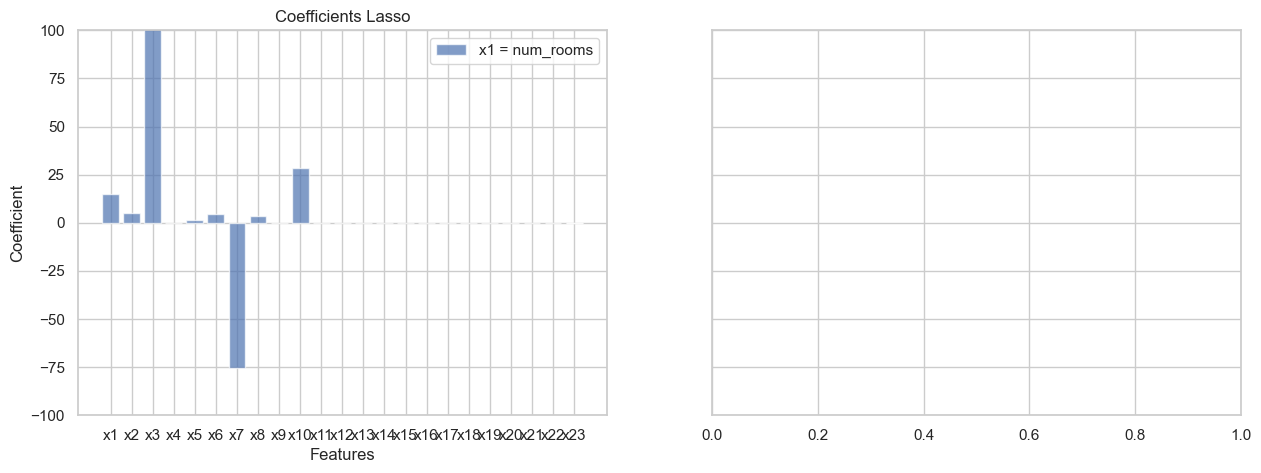

In [122]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

# Labels
labels = ['x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18', 'x19','x20','x21','x22','x23','x23']
feature_names = ['num_rooms', 'num_baths', 'square_meters', 'year_built',
                  'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
                    'num_floor', 'neighborhood_Ciutat Vella',
                   'neighborhood_Eixample', 'neighborhood_Gràcia', 'neighborhood_Horta',
                   'neighborhood_Les Corts', 'neighborhood_Nou Barris',
                   'neighborhood_Sant Andreu', 'neighborhood_Sant Martí',
                   'neighborhood_Sants', 'neighborhood_Sarrià-Sant Gervasi',
                   'orientation_east', 'orientation_north', 'orientation_south',
                   'orientation_west']
# limits 
y_min = -100
y_max = 100
x_min = -100
x_max = 100
# Lasso Regression Coefficients
bars1 = axes[0].bar(labels, coefs_lasso, color='b', alpha=0.7)
axes[0].set_title('Coefficients Lasso')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Coefficient')
axes[0].set_ylim([y_min, y_max])


# Filter labels and feature_names to include only non-zero coefficients
non_zero_labels = [label for label, coef in zip(labels, coefs_lasso) if coef != 0]
non_zero_feature_names = [name for name, coef in zip(feature_names, coefs_lasso) if coef != 0]
# Create a custom legend with feature names
legend_labels = {label: f"{label} = {name}" for label, name in zip(non_zero_labels, non_zero_feature_names)}
axes[0].legend(legend_labels.values(), loc='upper right')
plt.show()

<font size=5> 9.3 Test Data Prediction </font>

In [123]:
# Dropping unused features of Test data, only need to do it once so will not be done for Ridge as it is already here 
for dataset in [X_test]:
    dataset.drop(columns = ['id', 'price', 'num_door', 'traintest'], axis = 1, inplace = True)

# Predict with the Lasso model
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(Xt_train, yt_train)
y_lasso_predicted_prices = lasso.predict(X_test)

/var/folders/jp/ccdbvftd4pg2qt6s4b7bkv5m0000gn/T/ipykernel_3973/2175762952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns = ['id', 'price', 'num_door', 'traintest'], axis = 1, inplace = True)


<font size=5> 9.4 Predicted Prices Added to Test Dataset

In [124]:
test_ids = df_test['id']

# Add the predicted prices to the test dataset
df_test['price'] = y_lasso_predicted_prices
df_test['price'] = df_test['price'].astype(int)
df_test['price'].describe()

count    2000.000000
mean     1103.582500
std       206.230635
min       560.000000
25%       948.000000
50%      1105.000000
75%      1262.000000
max      1549.000000
Name: price, dtype: float64

<font size=5> 9.5 CSV Prediction of Prices </font>

In [125]:
# Save the test dataset with predicted prices to a new CSV file
df_test[['id', 'price']].to_csv('predicted_apartment_prices_final_lasso_GMR_v2.csv', index=False)

# 9. RIDGE MODEL

<font size=5> 9.1 Optimal Coefficients</font>

In [126]:
#Optimal coefficients:
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(Xt_train, yt_train)
coefs_ridge = ridge.coef_

<font size=5> 9.2 Test Data Prediction </font>

In [127]:
# Predict with the Ridge model
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(Xt_train, yt_train)
y_ridge_predicted_prices = ridge.predict(X_test)

<font size=5> 9.3 Predited Prices Added to Test Dataset </font>

In [128]:
test_ids = df_test['id']

# Add the predicted prices to the test dataset
df_test['price'] = y_ridge_predicted_prices
df_test['price'] = df_test['price'].astype(int)
df_test['price'].describe()

count    2000.000000
mean     1103.586500
std       208.195471
min       553.000000
25%       945.000000
50%      1103.000000
75%      1264.000000
max      1564.000000
Name: price, dtype: float64

<font size=5> 9.4 CSV Prediction Prices </font>

In [129]:
# Save the test dataset with predicted prices to a new CSV file
df_test[['id', 'price']].to_csv('predicted_apartment_prices_final_ridge_GMR_v2.csv', index=False)

# 10. CONCLUSION

From our model we predict that the most useful parameters are number of rooms, number of bathrooms, square meters, has a pool, number of crimes, has AC, accepts pets, and number of floor from our Lasso Model. The coeffcient with the highest effect being the 'square_meters' variable. 

# LIST OF STEPS GUILLEM


In order to treat the missing values, we will use the following methods:
1. We will drop the rows where the variable 'neighborhood' is missing.
2. We will then concatenate the train and test datasets to treat the missing values in the same way.
3. We will treat the outliers that appear in numerical variables.
    Justification for the treatment used can be found below, in the section 'OUTLIER TREATMENT'.
4. We will change the dummy variables to 0/1 instead of False/True.
5. We will Standardize the pertinent variables (numerical variables that are not dummies).
6. We will impute all of the missing values using KNNImputer except for variables 'orientation and 'neighborhood' (and without taking price into account).
7. We will rejoin the main dataset with all the variables imputed and then use those to impute the variables in 'neighborhood'.
8. We will apply OneHotEncoding to the variables 'neighborhood' and 'orientation'.
9. We will then separate the train and test datasets again and rename them to X_train, X_test, y_train. 
10. We will create a new dataset and separate it into Xt_train, Xt_test, yt_train and yt_test (it will be created from the main one and be used to perform cross validation).


# STUFF WE COULD DELETE NOT THAT IMPORTANT TO GRAPH

FOR BOOLEANS, REMOVE REFERS TO PAIRWISE DELETION

NUM_BATHROOMS treat identically to num_rooms

SQUARE_METERS a lot of negatives
treat it 3 different ways, 1) remove negatives (just leave values as positives) and then treat outliers with mean imputation, 2) replace with mean per neighborhood, 3) Logical approach

ORIENTATION only relevant in relation to the neighborhood and above a certain floor if it's facing the sea (treat as secondary)

FLOOR treat missing values (by neighborhood)

DOOR the actual door not important but extracting the floor is important

FURNISHED boolean value (secondary), MISSING VALUES REMOVE

HAS POOL boolean value (secondary), MISSING VALUES REMOVE, analyze the effect by neighborhood

NEIGHBORHOOD categorical variable, MISSING VALUES REMOVE, check (secondary check)

NUM_CRIMES ANALYZE PER NEIGHBORHOOD, NEIGHBORHOODS TOO WIDE TREAT CAREFULLY

HAS_AC boolean value, MISSING VALUES REMOVE

ACCEPTS_PETS boolean value, MISSING VALUES REMOVE

NUM_SUPERMARKETS too many missing, JUST REMOVE COLUMN

num_rooms, outliers in > 6, propose removal.

# what is this df_train square meter imputation if not using it in df_whole data? DO WE DELETE OR USE IT?

count    7845.000000
mean      109.158062
std        35.367737
min         2.000000
25%        79.000000
50%       110.000000
75%       140.000000
max       170.000000
Name: square_meters, dtype: float64


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0,1.0
3,6088,1.0,2.0,41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,8.0,4.0


/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


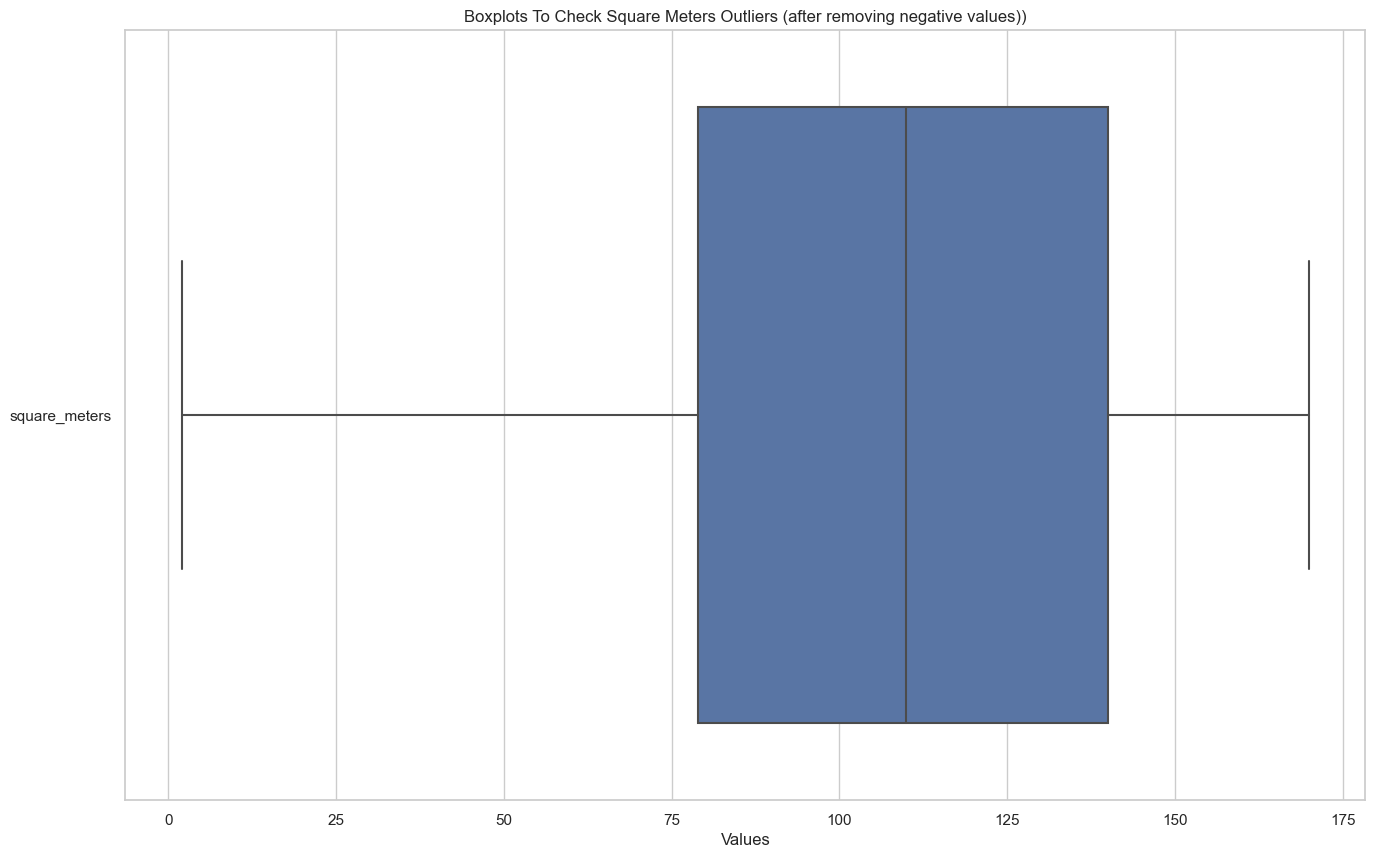

In [88]:
# Replace negative 'square_meters' values with their absolute values in df_train
df_train.loc[df_train['square_meters'] < 0, 'square_meters'] = df_train.loc[df_train['square_meters'] < 0, 'square_meters'].abs()
print(df_train['square_meters'].describe())
display(df_train)

# Create a matrix of boxplots using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed

# Specify the columns you want to create boxplots for
columns_to_plot = ['square_meters']

# Create the matrix of boxplots
sns.boxplot(data=df_train[columns_to_plot], orient="h")

# Customize the appearance or layout as needed
plt.title("Boxplots To Check Square Meters Outliers (after removing negative values))")
plt.xlabel("Values")
plt.show()

#describe matrix and boxplot confirm that negative values have now been removed

In [ ]:

'''common_cols = df_whole.columns.intersection(df_whole_impute.columns)
df_whole[common_cols] = df_whole_impute[common_cols]



for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")


df_neigh_impute = df_whole.copy()
df_neigh_impute = df_neigh_impute.drop(columns = ['id', 'orientation', 'price'], axis = 1)

#display(df_whole[df_whole['id'] == 8572])

list_of_neigh = df_neigh_impute['neighborhood'].unique()
list_of_neigh = list_of_neigh.tolist()
list_of_neigh.remove(np.nan)
#display(list_of_neigh, len(list_of_neigh))

mapping = {}

for i in range(len(list_of_neigh)):
    mapping[list_of_neigh[i]] = range(len(list_of_neigh))[i] + 1

rev_mapping = {value: key for key, value in mapping.items()}
#display(mapping, rev_mapping)

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(mapping)

#labeler = LabelEncoder()
#labeler.fit(df_neigh_impute['neighborhood'])
#df_neigh_impute['neighborhood'] = labeler.transform(df_neigh_impute['neighborhood'])
#display(df_neigh_impute)
#display(df_neigh_impute.loc[7757])

knn_imputer = KNNImputer(n_neighbors = 25)
imputed_data = knn_imputer.fit_transform(df_neigh_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_neigh_impute.columns)
df_neigh_impute['neighborhood'] = imputed_df['neighborhood'].round(0)

#display(df_neigh_impute.loc[7757])
#df_neigh_impute['neighborhood'] = labeler.inverse_transform(df_neigh_impute['neighborhood'].astype(int))

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(rev_mapping)

print((df_whole['neighborhood'] == df_neigh_impute['neighborhood']).sum())

df_whole['neighborhood'] = df_neigh_impute['neighborhood']


for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")


#display(df_whole[df_whole['neighborhood'].isna()])

display(df_whole)
display(df_neigh_impute)

for col in df_neigh_impute.columns:
    print((df_whole[col] == df_neigh_impute[col]).sum())'''

# DATA/ GRAPH THAT ARE NOT WORKING ANYMORE

/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

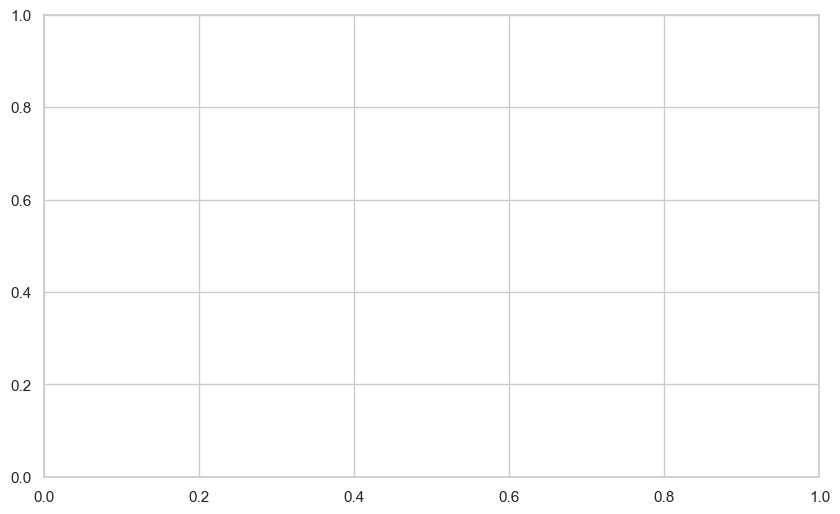

In [98]:
# Filter rows where 'neighborhood' is not missing
df_filtered = df_train.dropna(subset=['neighborhood'])

# Group the filtered DataFrame by values in 'square_meters' and calculate the count of missing values in 'neighborhood'
missing_values_counts = df_filtered.groupby('neighborhood')['square_meters'].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_counts.rename(columns={'square_meters': 'Missing Values Count'}, inplace=True)

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_values_counts, x='neighborhood', y='Missing Values Count', hue = 'neighborhood', palette='viridis', legend = False)
plt.title(f'Missing Values Count of "square_meters" by "neighborhood"')
plt.xlabel('neighborhood')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()